# **<center>Stock Price Prediction with Technical & Fundamental Analysis</center>**
**Stock**
* Stocks, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor's portfolios. 

In [1]:
!pip install yfinance==0.2.12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/59.2 kB ? eta -:--:--
   ---------------------------------------- 59.2/59.2 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.53
    Uninstalling yfinance-0.2.53:
      Successfully uninstalled yfinance-0.2.53


In [2]:
ticker = "ADANIENT.NS"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years' data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.sort_values(by ='Date', ascending = False).head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2025-02-17  2152.649902  2240.399902  2110.649902  2223.699951  2223.699951   
2025-02-14  2245.699951  2249.300049  2124.550049  2152.649902  2152.649902   
2025-02-13  2354.000000  2372.750000  2233.399902  2244.699951  2244.699951   
2025-02-12  2325.000000  2378.449951  2281.000000  2353.449951  2353.449951   
2025-02-11  2312.000000  2397.000000  2306.000000  2321.750000  2321.750000   

             Volume  
Date                 
2025-02-17  1400059  
2025-02-14  2549876  
2025-02-13  2551665  
2025-02-12  1933098  
2025-02-11  4895456

### **Key Definitions**
**Open:** The opening price of a stock at the beginning of a trading day.

**High:** The highest price a stock reaches during a trading day.

**Low:** The lowest price a stock reaches during a trading day.

**Close:** The closing price of a stock at the end of a trading day.

**Adj Close:** The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

**Volume:** The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [16]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2025-02-10  2350.000000  2350.949951  2280.100098  2290.800049  2290.800049   
2025-02-11  2312.000000  2397.000000  2306.000000  2321.750000  2321.750000   
2025-02-12  2325.000000  2378.449951  2281.000000  2353.449951  2353.449951   
2025-02-13  2354.000000  2372.750000  2233.399902  2244.699951  2244.699951   
2025-02-14  2245.699951  2249.300049  2124.550049  2152.649902  2152.649902   

             Volume  
Date                 
2025-02-10   739708  
2025-02-11  4895456  
2025-02-12  1933098  
2025-02-13  2551665  
2025-02-14  2549876

In [17]:
df.shape

(1240, 6)

In [28]:
df = df.reset_index()

ValueError: cannot insert Date, already exists

In [29]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Day_Perc_Change    1
dtype: int64

In [30]:
df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Adj Close                 float64
Volume                      int64
Day_Perc_Change           float64
dtype: object

In [31]:
df['Date'].max() - df['Date'].min()

Timedelta('1827 days 00:00:00')

* There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

**High-level overview of how the Adani Enterprises stock performed in about last couple of months** 

In [23]:
df.iloc[-90:].describe().astype(int)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Timestamp'

* In last 90 days, the average closing price for Adani Enterprises  was about ₹3517.
* Min price in the last 90 days clocked 1565.
* For about 75% of time the stock was trading below ₹3928 and it clocked maximum of ₹4165. The maximum volume of shares traded on a single day was 43885579 with median quantity being 1822552.
* Based on the above few points, on broad level we can certainly say that the stock is highly volatile.

In [32]:
df.index = df['Date']

**Now plot the closing price (adjusted) of the stock over the period of 14 years to get a general idea of how the stock performed in the given period**

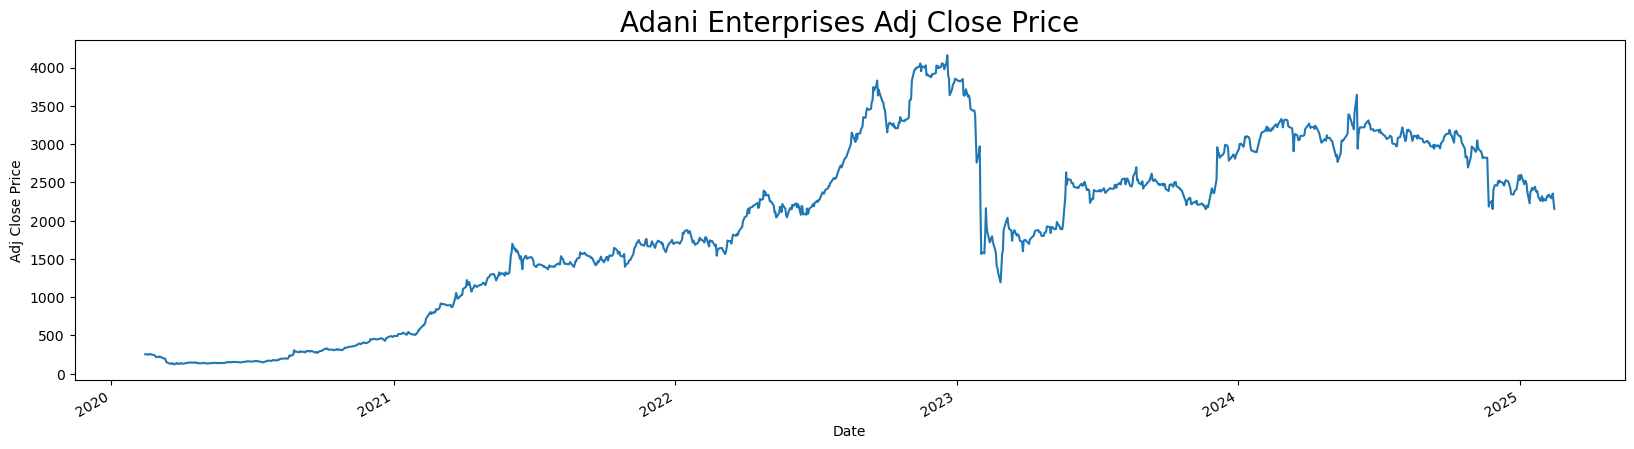

In [33]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* In the above plot, if you notice, there is a  increase in the price of stock sometime around 2021

**Let's plot for last 2 years and see the trends**

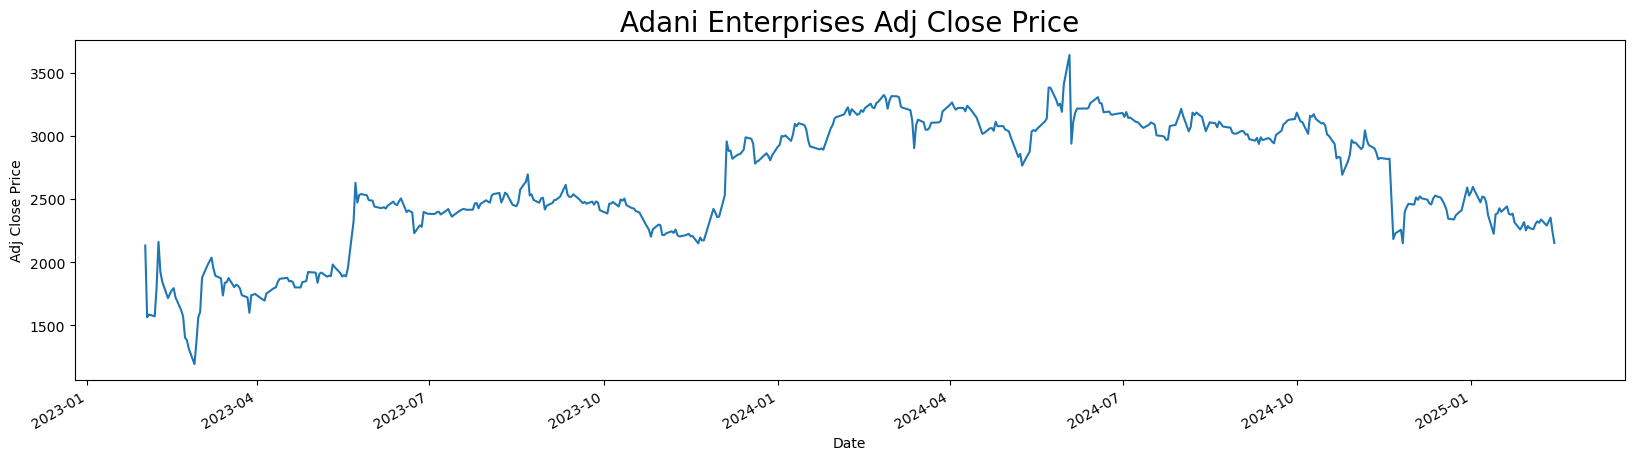

In [34]:
df['Adj Close'].iloc[-504:].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* As the trends of the stock was upwards and suddenly there is a drastic decrese around Jan'21. The main reason for this drastic decrease was Hindenburg report

## **Day-to-day percentage change(Daily returns)**
* Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days' closing prices. Let's say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

In [35]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

Date        Open        High         Low       Close  \
Date                                                                    
2020-02-14 2020-02-14  252.500000  258.600006  251.550003  256.149994   
2020-02-17 2020-02-17  256.899994  257.399994  251.649994  252.500000   
2020-02-18 2020-02-18  251.649994  251.649994  245.250000  249.449997   
2020-02-19 2020-02-19  250.000000  255.500000  249.899994  254.000000   
2020-02-20 2020-02-20  253.199997  261.000000  252.649994  258.649994   

             Adj Close   Volume  Day_Perc_Change  
Date                                              
2020-02-14  253.657013  4968325              NaN  
2020-02-17  250.042526  2411524        -1.424950  
2020-02-18  247.022186  2430446        -1.207931  
2020-02-19  251.527924  2101729         1.824021  
2020-02-20  256.132690  3108173         1.830718

In [36]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

**Plot a graph for daily returns over the priods of 13 years**

Text(0, 0.5, 'Percenatge returns')

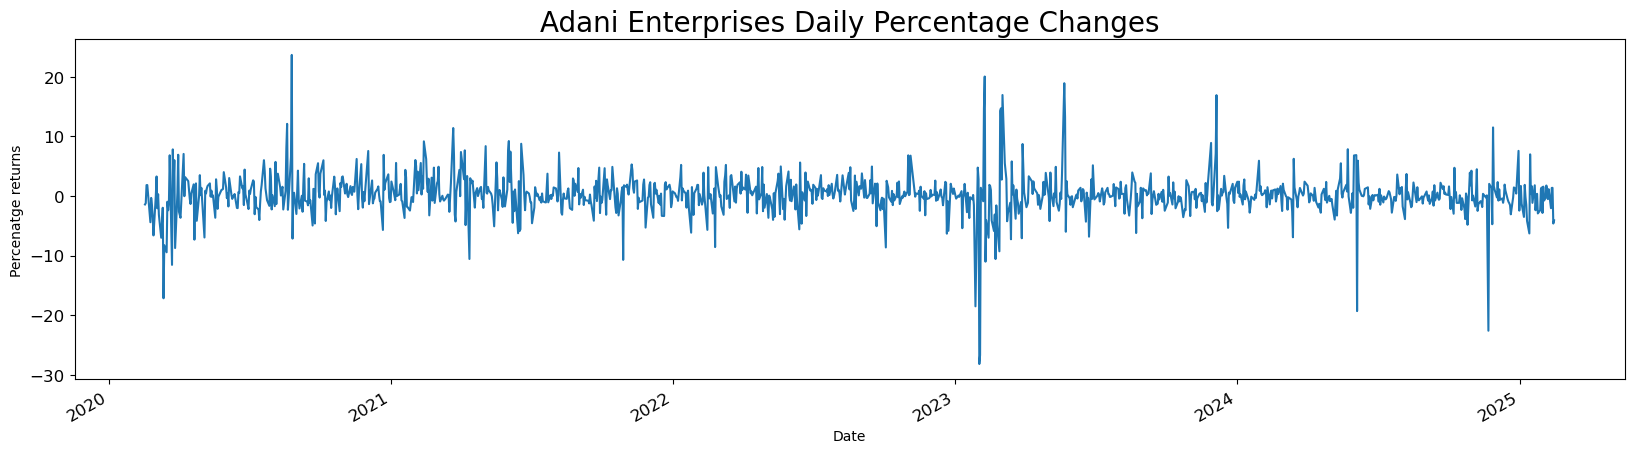

In [37]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with few instance of drastic negative and postive changes

**Plot a graph for daily returns over the priods of 2 years**

Text(0, 0.5, 'Percenatge returns')

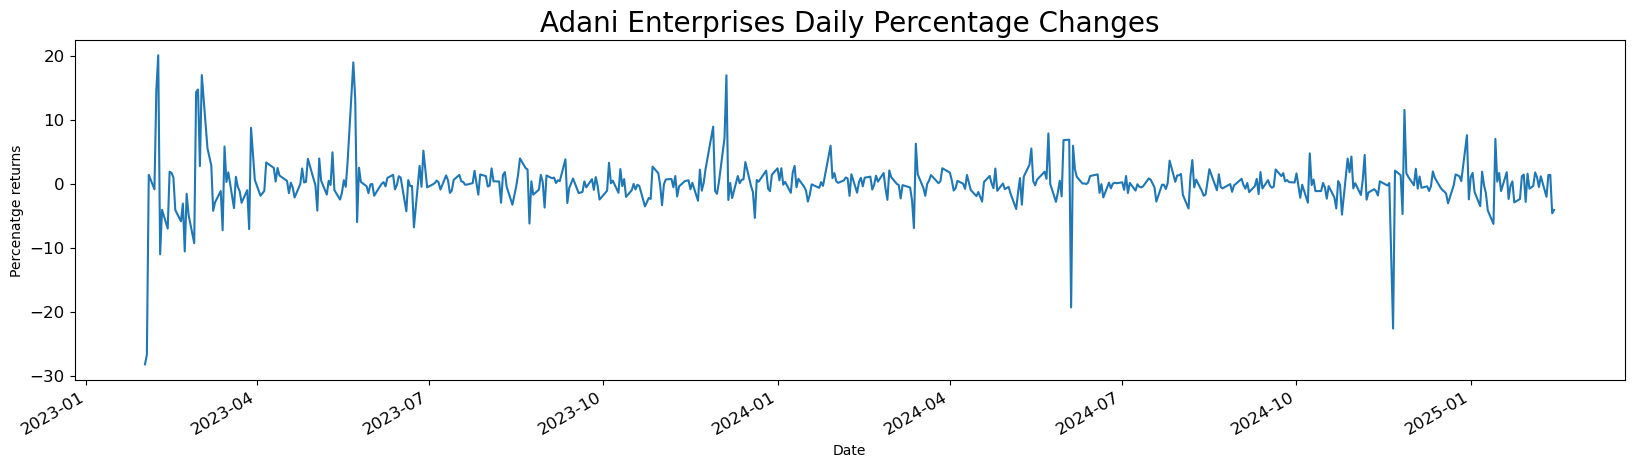

In [38]:
df['Day_Perc_Change'].iloc[-504:].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, in thelast 2 years the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with one instance of drastic negative changes in the month of Jan'23 due to hindenburg report

**Plot daily return distribution histogram**

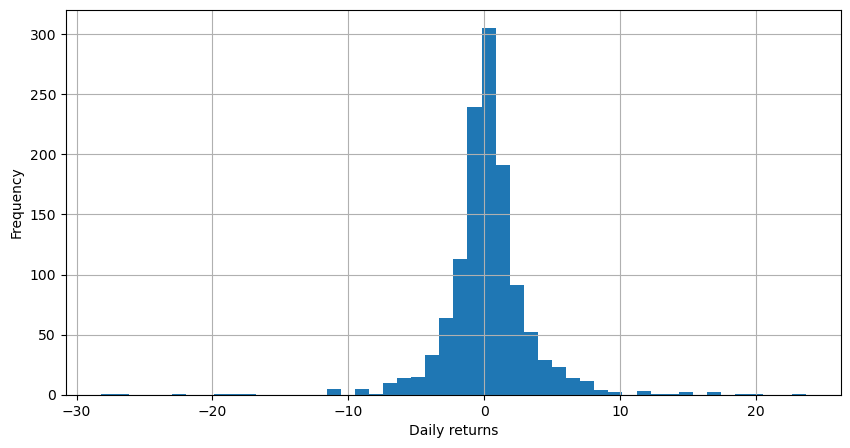

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    1239.000000
mean        0.232533
std         3.423257
min       -28.196979
25%        -0.994301
50%         0.160522
75%         1.375970
max        23.663043
Name: Day_Perc_Change, dtype: float64

In [39]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

* The daily returns histogram is centered about origin. For the past 13 years, the mean daily returns has been about 0.161993% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 27.367529% and was 38.749320% in negative direction

**Plot daily return distribution histogram over the priods of 2 years**

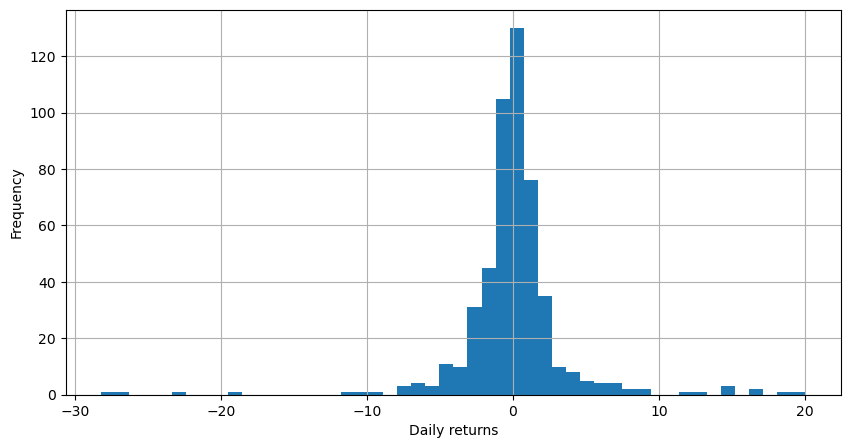

------------------------------------
Basic Statisics for Daily Percentages for 2 years


count    504.000000
mean       0.012575
std        3.837851
min      -28.196979
25%       -1.105505
50%       -0.015619
75%        1.136528
max       20.039381
Name: Day_Perc_Change, dtype: float64

In [40]:
df['Day_Perc_Change'].iloc[-504:].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 2 years")
df['Day_Perc_Change'].iloc[-504:].describe()

* The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.309905% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 20.039380% and was 28.196980% in negative direction

## **Trend Analysis**
**Trend is determined from below relationship —**
<center>
<table>
  <tr>
    <th>Daily Percentage Change</th>
    <th>Trend</th>
  </tr>
  <tr>
    <td>-0.5 to 0.5</td>
    <td>Slight or No Change</td>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Slight Positive</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Slight Negative</td>
  </tr>
  <tr>
    <td>1 to 3</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-1 to -3</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>3 to 7</td>
    <td>Among Top Gainers</td>
  </tr>
  <tr>
    <td>-3 to -7</td>
    <td>Among Top Losers</td>
  </tr>
  <tr>
    <td>Above 7</td>
    <td>Bull Run</td>
  </tr>
  <tr>
    <td>Below 7</td>
    <td>Bear Drop</td>
  </tr>
</table>
</center>

In [41]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

Date        Open        High         Low       Close  \
Date                                                                    
2020-02-17 2020-02-17  256.899994  257.399994  251.649994  252.500000   
2020-02-18 2020-02-18  251.649994  251.649994  245.250000  249.449997   
2020-02-19 2020-02-19  250.000000  255.500000  249.899994  254.000000   
2020-02-20 2020-02-20  253.199997  261.000000  252.649994  258.649994   
2020-02-24 2020-02-24  254.800003  255.850006  244.100006  247.250000   

             Adj Close   Volume  Day_Perc_Change             Trend  
Date                                                                
2020-02-17  250.042526  2411524        -1.424950          Negative  
2020-02-18  247.022186  2430446        -1.207931          Negative  
2020-02-19  251.527924  2101729         1.824021          Positive  
2020-02-20  256.132690  3108173         1.830718          Positive  
2020-02-24  244.843613  3309214        -4.407511  Among top losers

### **Pie chart**

**Past 13 years trend**

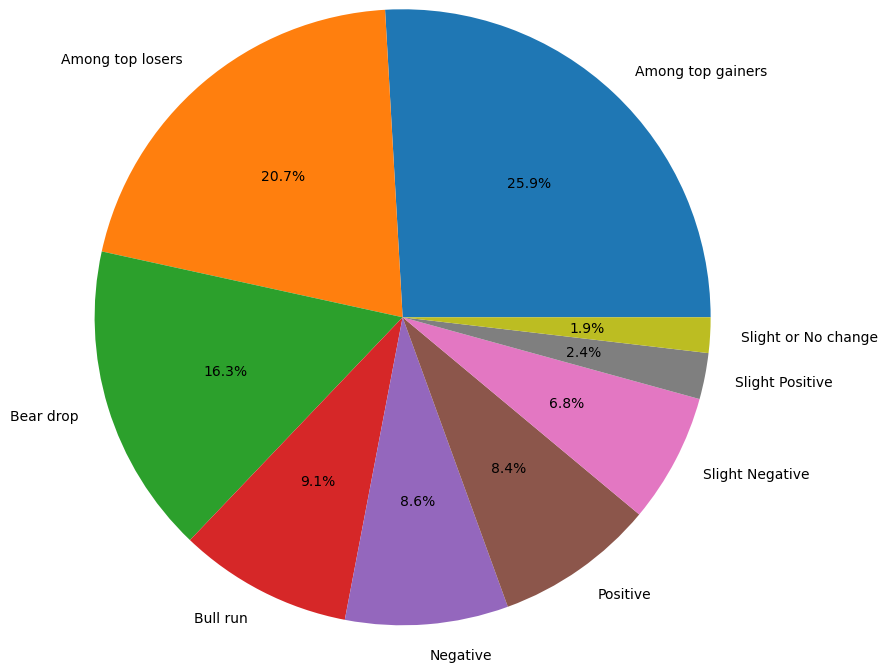

In [42]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 13 yeras period, the ADANI Enterprise stock was among the top gainers for about 20.9% of the time, and among the top losers for 20.9 %. 
* For about 8.1% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

**Past 2 years trend**

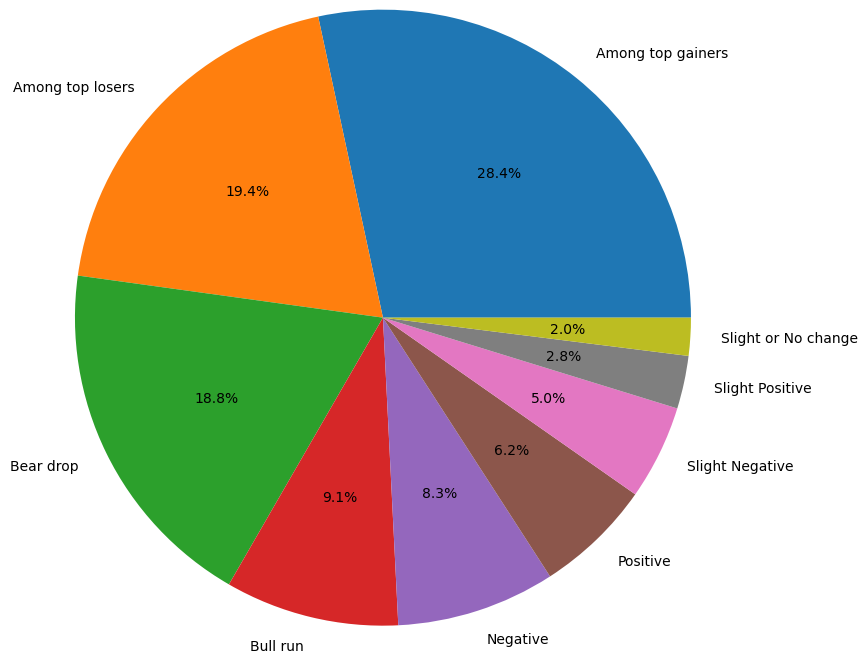

In [43]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].iloc[-504:].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 2 yeras period, the ADANI Enterprise stock was among the top gainers for about 25.4% of the time, and among the top losers for 22.4 %. 
* For about 8.7% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

## **Daily Returns and Volume**

**FOr 13 years period**

<Axes: xlabel='Date'>

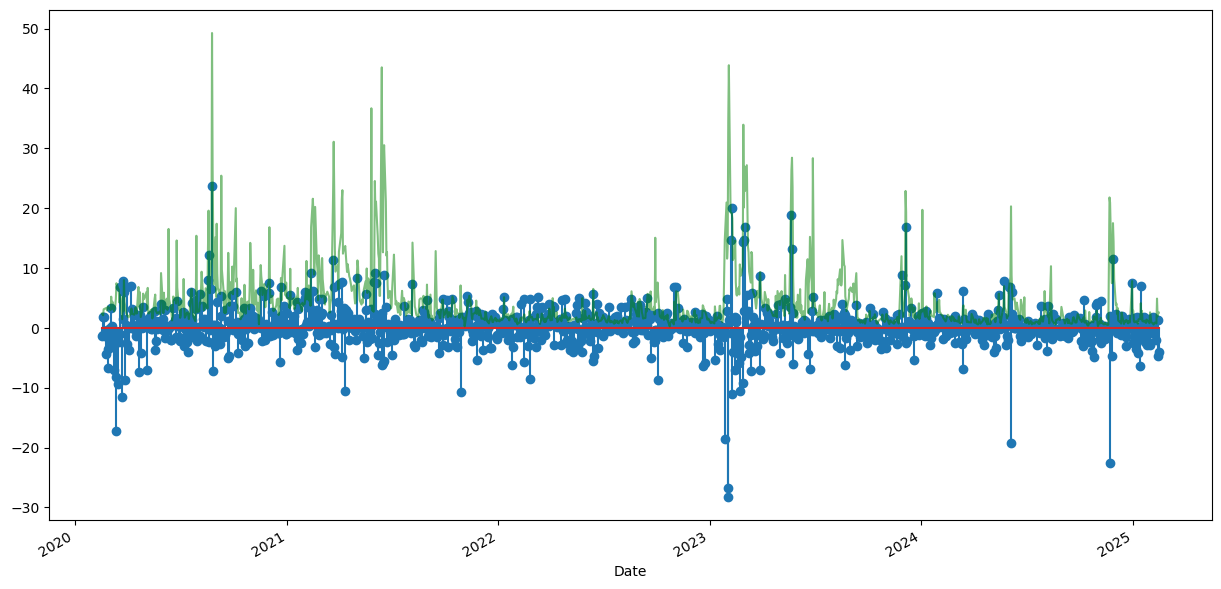

In [44]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

**FOr 2 years period**

<Axes: xlabel='Date'>

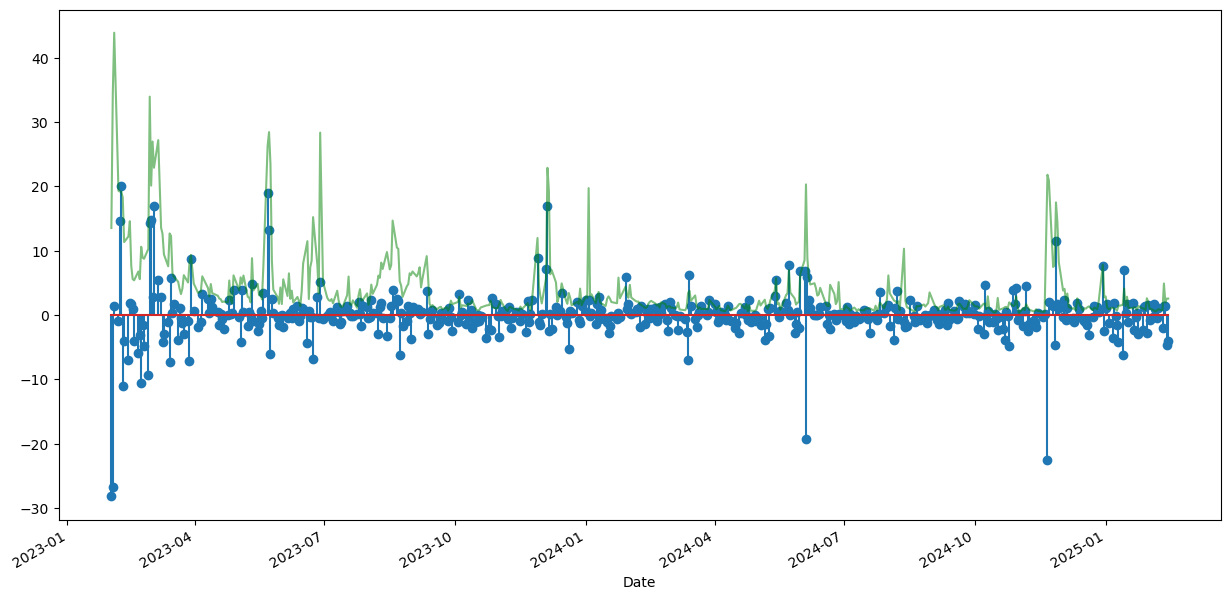

In [45]:
plt.stem(df['Date'].iloc[-504:], df['Day_Perc_Change'].iloc[-504:])
(df['Volume'].iloc[-504:]/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

## **Correlation Analysis Of Stocks with Pair plot and Joint plots**
* “Never put all your eggs in a single basket”

* Whenever we go for the diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson's correlation coefficient (also called Pearson's R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you're at the risk of losing all your investment!

* I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.


In [88]:
# Adj close price of all the stocks
combined_df = yf.download(["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"], period = "5y")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  5 of 5 completed


ADANIENT.NS  EICHERMOT.NS  INFY.NS  PAGEIND.NS  TATASTEEL.NS
Date                                                                    
2020-02-14       253.66       1792.17   699.75    21279.31         17.48
2020-02-17       250.04       1776.10   702.42    21376.29         17.57
2020-02-18       247.02       1797.61   709.71    21663.89         17.36
2020-02-19       251.53       1808.62   712.20    21775.27         17.43
2020-02-20       256.13       1806.07   709.13    21931.19         17.84

### **Pairplot**

C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x500 with 0 Axes>

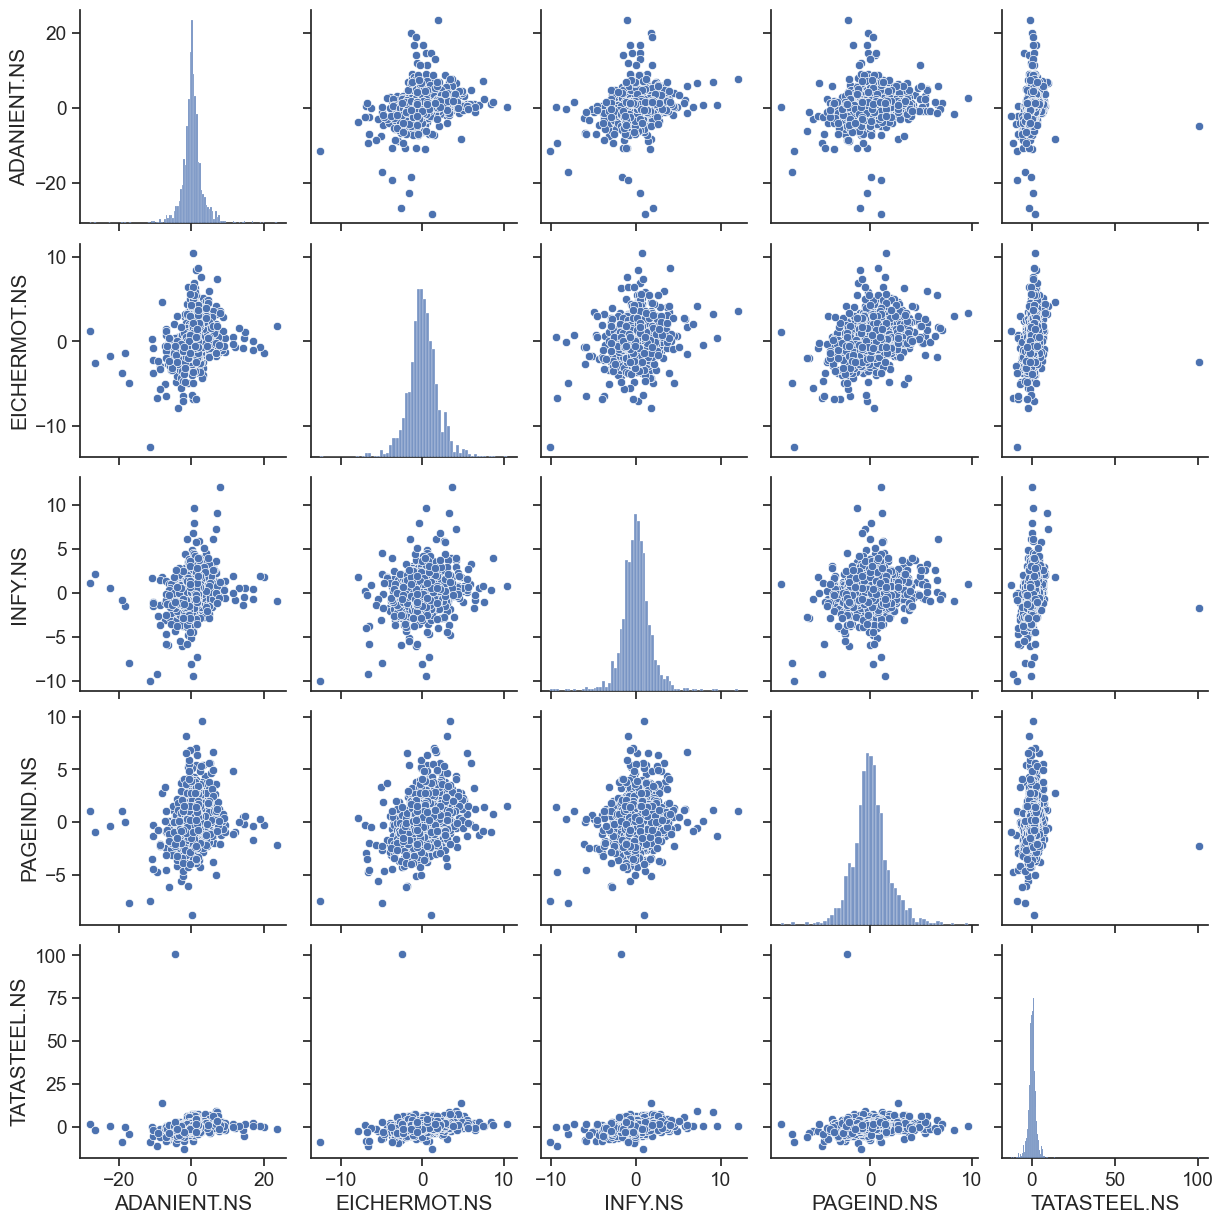

In [89]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

* ***Correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price.***
* If you observe carefully, the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. So, analyzing either set of plots would suffice. The diagonal represents the histograms, just like the one seen above for ADANI Enterprises stock.
* ADANI ENTERPRISES, EICHER MOTORS , INFY ,PAGEIND and TATASTEEL can be included in a portfolio as no two stocks show any significant correlation.


---


**Drawback of Correlation PLots:**
* Although the pair plots provide very good visualization of all possible combinations between the bunch of stocks, it doesn't provide any detailed information like Pearson's R value or null-hypothesis p value to quantify the correlation. That's where the joint plot comes into the picture!

### **Jointplot**
* While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson's R value (Pearson's correlation coefficient) for each pair of stocks. Pearson's R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson's R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

* In addition to Pearson's R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.



C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1494377147.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.pearsonr(df[a], df[b])
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1494377147.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1494377147.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.pearsonr(df[a], df[b])
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1494377147.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1494377147.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.pearsonr(df[a], df[b])


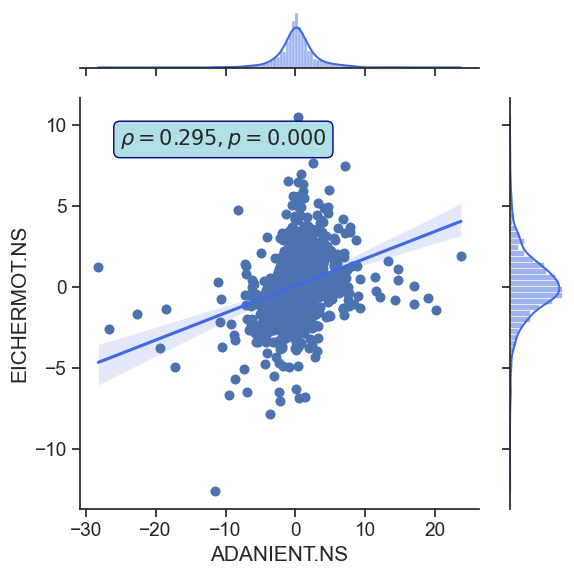

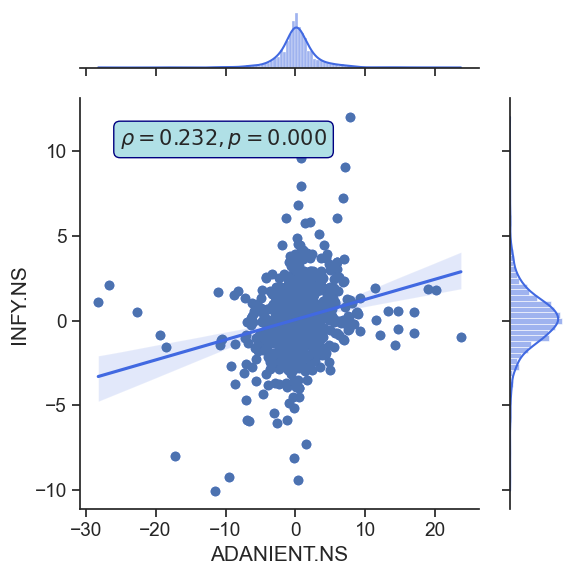

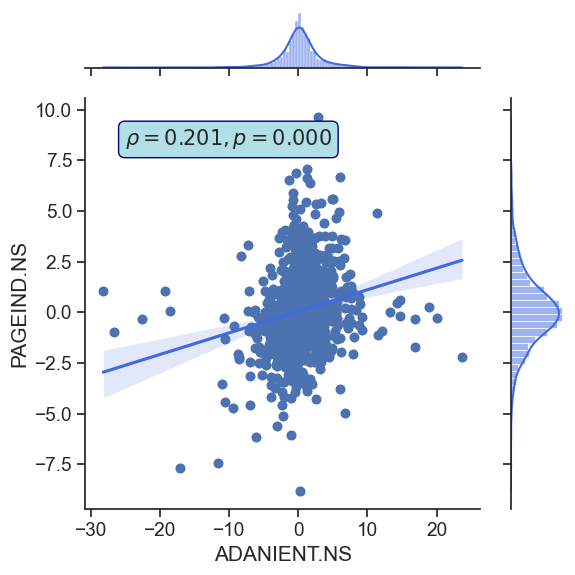

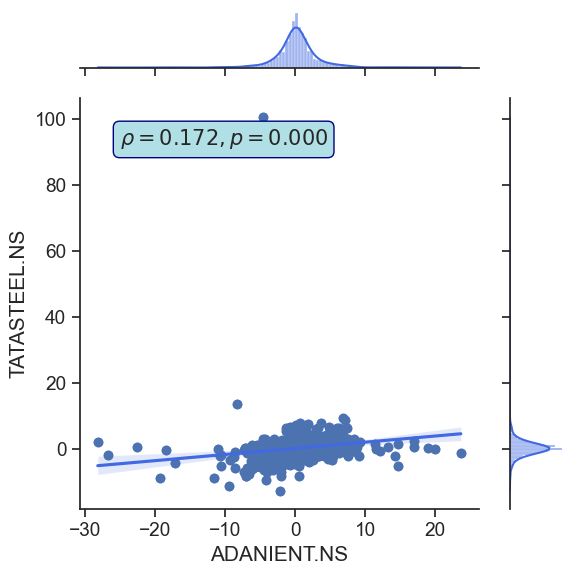

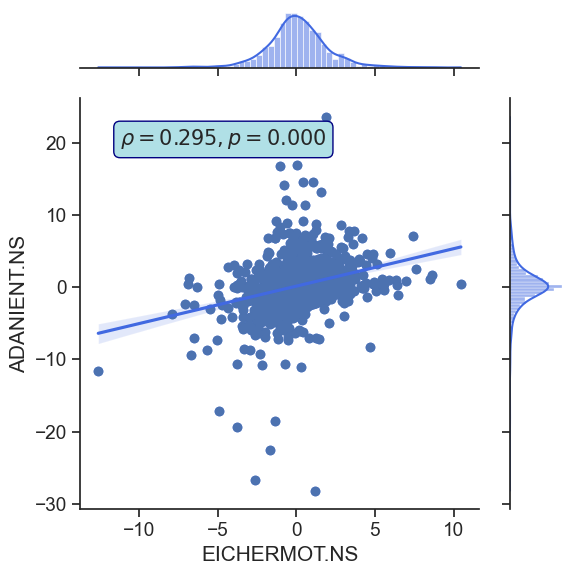

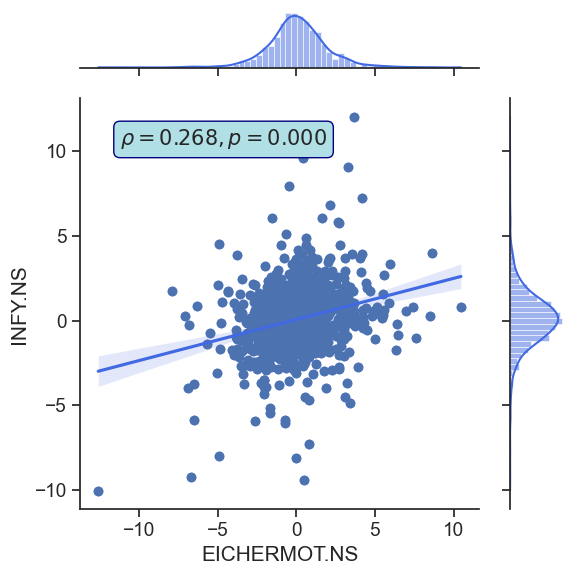

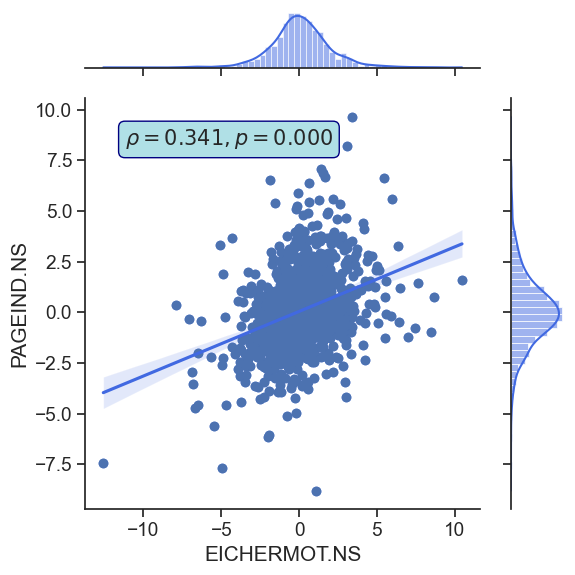

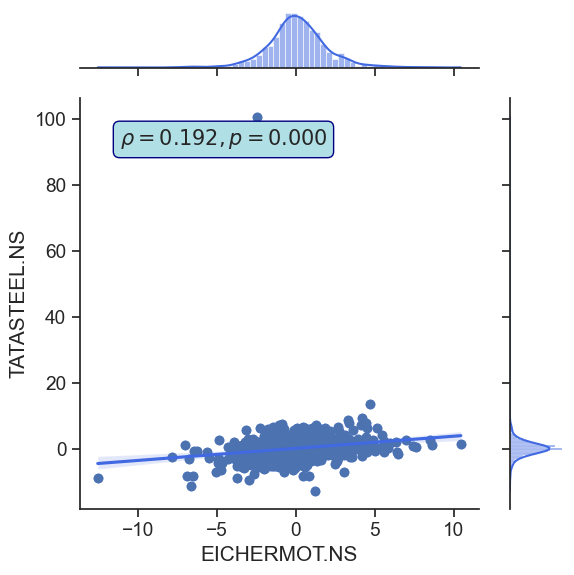

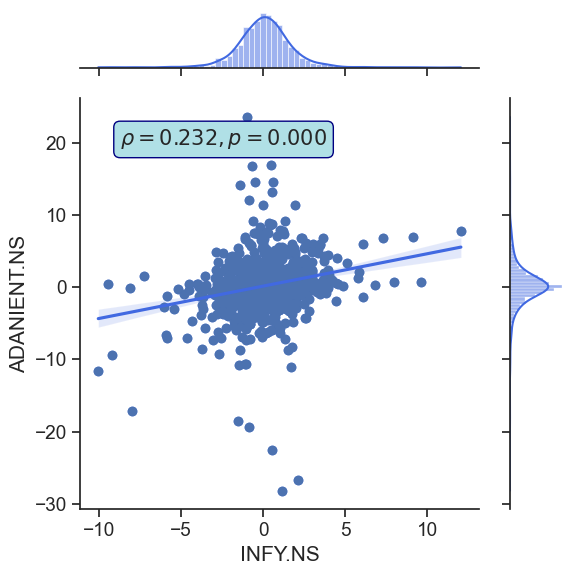

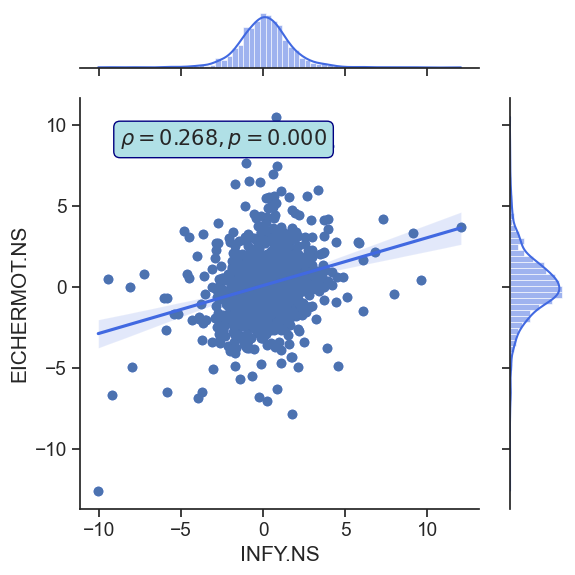

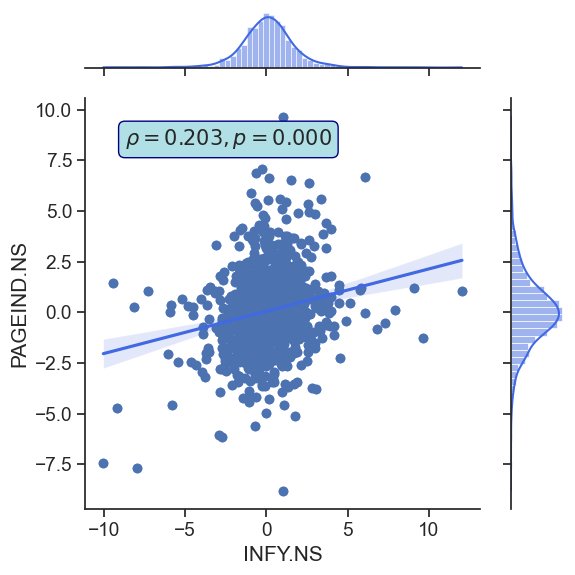

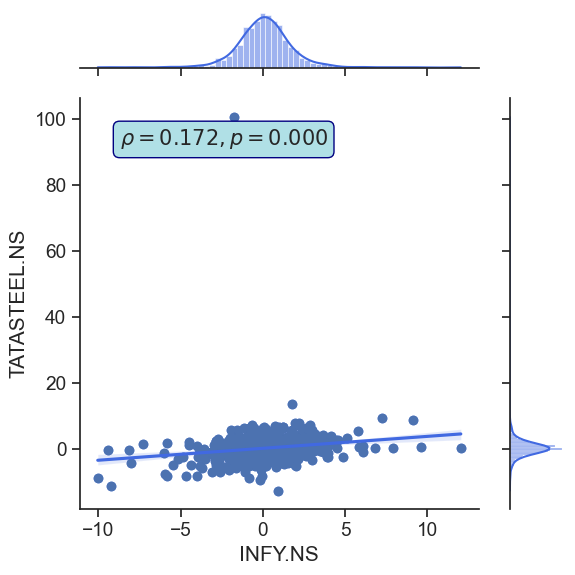

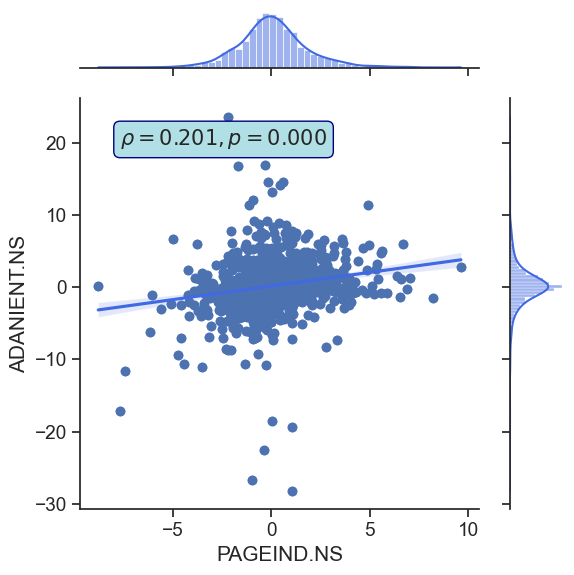

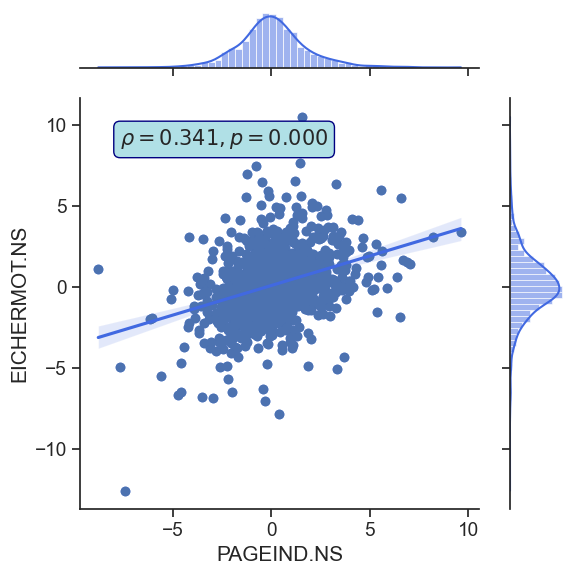

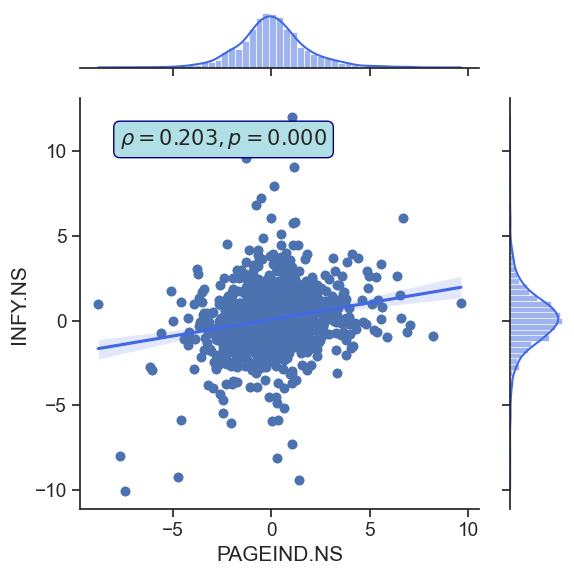

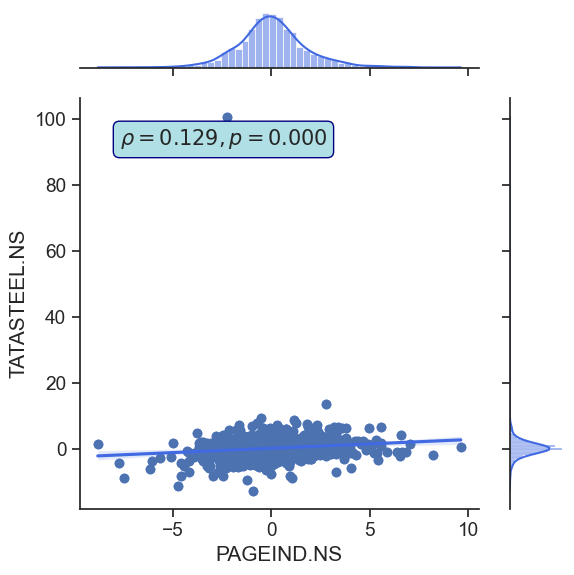

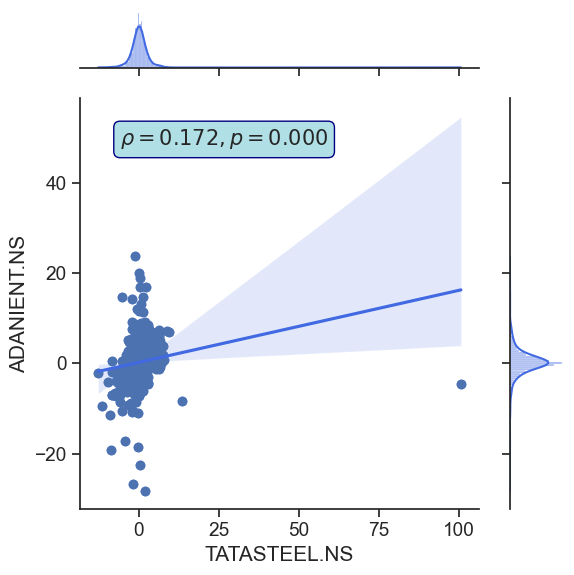

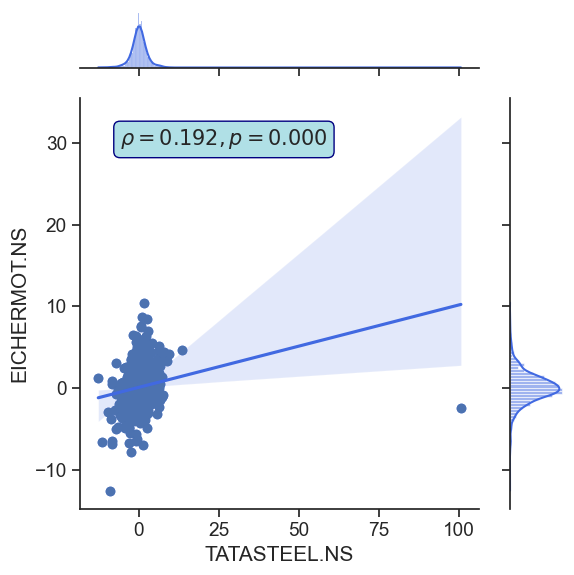

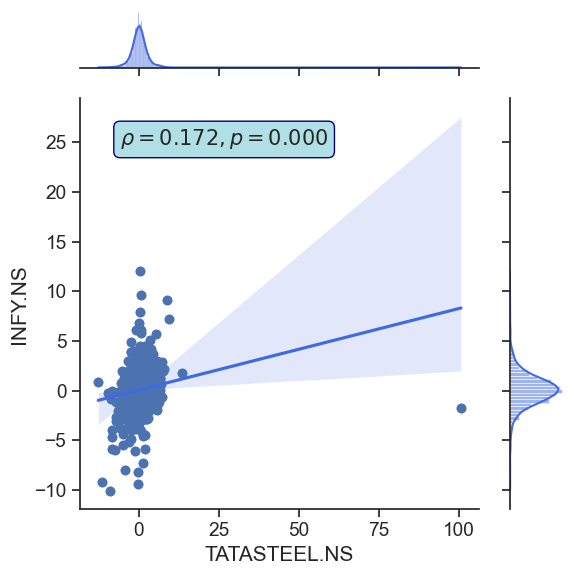

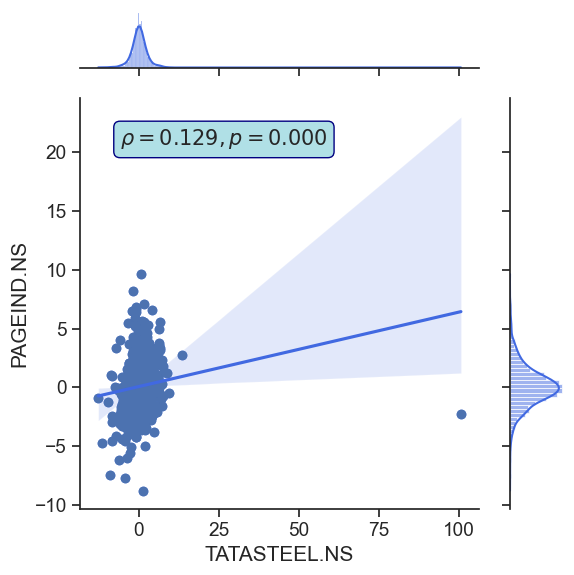

In [90]:
from scipy.stats import stats

def joint_plot(df, a, b):
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g
index = 1
for i in pct_chg_df.columns:
  for j in pct_chg_df.columns:
      if i!=j:
        joint_plot(pct_chg_df,i,j)

* All of the stocks are less correlated. So, we can include all the stocks in our portfolio
* Beware! having correlation is not the only parameter to determine which stocks to include in an portfolio and which to remove. There are several other factors at play

### **Volatility analysis**
* Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. These movements are due to several factors including demand and supply, sentiment, corporate actions, greed, and fear, etc. Mathematically, volatility is measured using a statistical measure called 'standard deviation', which measures an asset's departure from its average value.
* We have already calculated the intraday returns (daily returns) of the ADANI Enterprises stock and several other stocks. Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns, then compute the standard deviation (which is square root of the variance) and plot the values.

Text(0.5, 1.0, 'Adani Enterprises Volatility')

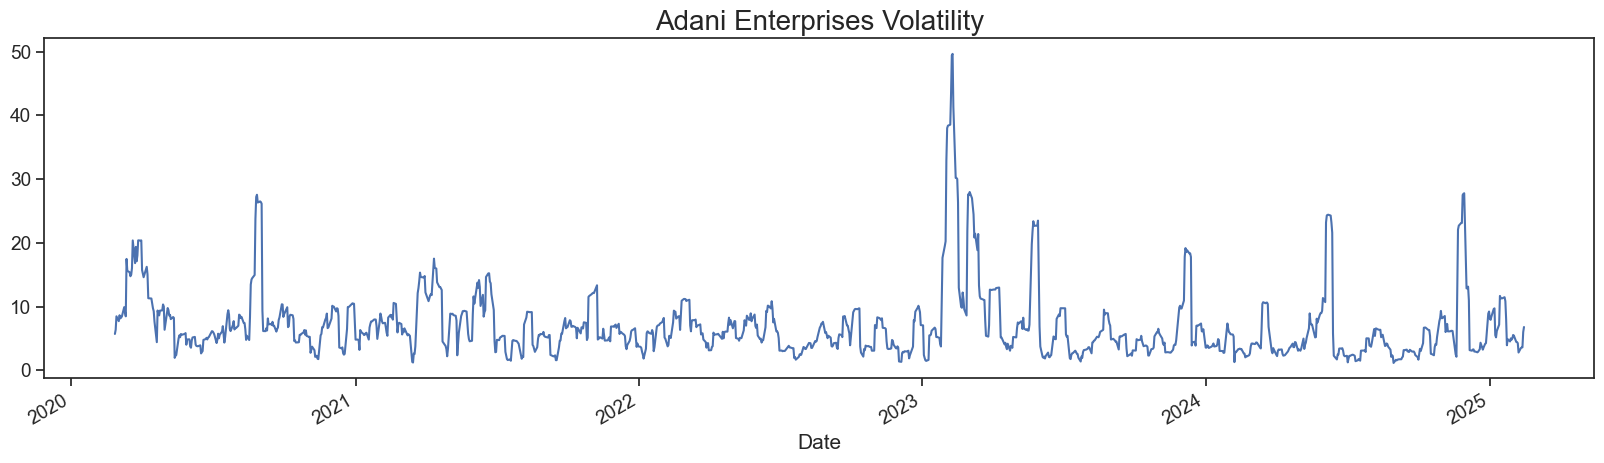

In [91]:
ADANI_vol = pct_chg_df['ADANIENT.NS'].rolling(7).std()*np.sqrt(7)
ADANI_vol.plot(figsize = (20, 5))
plt.title("Adani Enterprises Volatility", fontsize = 20)

Text(0.5, 1.0, 'Stock Returns Volatility')

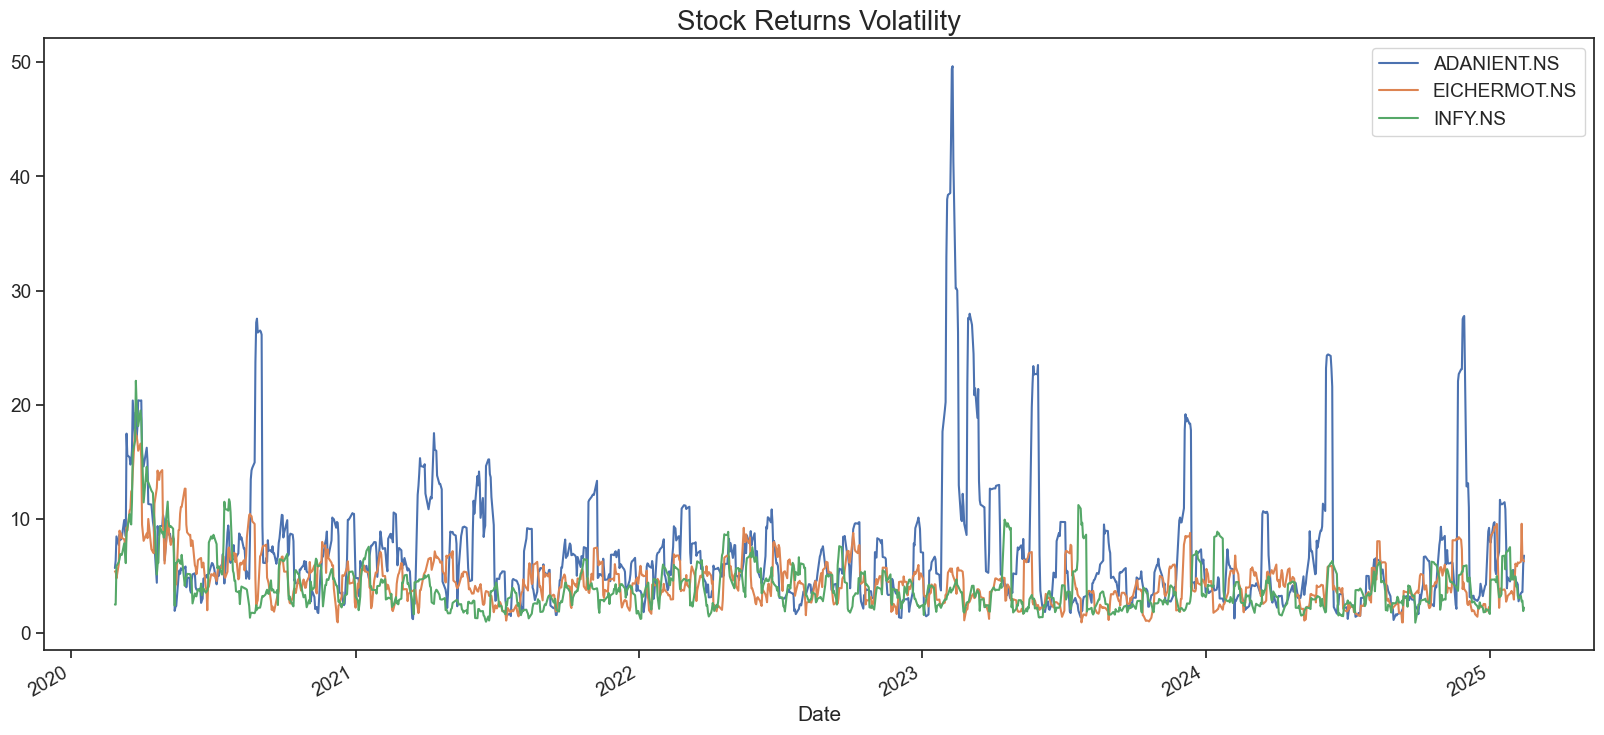

In [92]:
volatility = pct_chg_df[['ADANIENT.NS','EICHERMOT.NS','INFY.NS']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 9))
plt.title("Stock Returns Volatility", fontsize = 20)

* You can observe that ADANI Enterprises stock has higher volatility as compared to Eicher Motors and Infosys stock
* Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

## **Technical Analysis**
**Technical Indicators**
* Investors usually perform due diligence on a handful of companies to select their target companies. There is no guarantee that an investor will make money and some investors lose some, if not all, of their investments hence it is wise not to invest in a company that is going to go bust or that is overvalued and its share price is already too high.

* Investors usually perform fundamental analysis on a company to understand whether it is worth buying its stock. Once they have selected the chosen companies to invest their money in, they then need to evaluate when to buy the stock. Time is important in stock investing too. This is where the technical indicators can come in handy.

* ***An investor performs technical analysis to compute technical indicators. These indicators can help an investor determine when to buy or sell a stock.***

* There are a large number of technical indicators available that are used by the investors. The key is to use a handful of them that meets the trading strategies of the investors and make sense for the current market situation. Too many indicators can clutter the charts and add unnecessary noise.

* The technical indicators use the OHLCV data. it means the open, high, low, close, and volume of trades. These measures of a stock can be used to compute technical indicators.

* The technical indicators can help us with our investment choices.

* There is a large number of technical indicators available. The technical indicators can be grouped into Momentum Indicators, Volume Indicators, Volatility Indicators, Trend Indicators, and Others Indicators.

### **Crossover Analysis**

A crossover analysis is a technical analysis technique used to identify potential buy and sell signals in a stock's price trend. In the case of ADANIENT.NS, we can use a crossover analysis to identify when the 50-day moving average crosses above or below the 200-day moving average.

<br>

The 50-day moving average represents the average price of the stock over the past 50 days, while the 200-day moving average represents the average price of the stock over the past 200 days. By comparing these two moving averages, we can get a sense of the overall trend of the stock price.

When the 50-day moving average is above the 200-day moving average, it is considered a bullish signal, indicating that the stock price may continue to rise. Conversely, when the 50-day moving average is below the 200-day moving average, it is considered a bearish signal, indicating that the stock price may continue to fall.

<br>
<br>

To perform a crossover analysis, you will need to plot two moving averages for the stock price, typically a shorter-term moving average (e.g. 50-day moving average) and a longer-term moving average (e.g. 200-day moving average). The crossover occurs when the shorter-term moving average crosses above or below the longer-term moving average, indicating a potential trend reversal.

The rolling function is used to calculate the rolling mean (moving average) of the closing price over a specified window size (50 days and 200 days in this example). The fill_between function is used to highlight the regions where the 50-day moving average is above or below the 200-day moving average.

<br><br>

Crossover analysis is just one of many technical analysis tools used to analyze stock prices, and should not be used in isolation to make investment decisions. It's important to also consider fundamental analysis, market trends, and other factors that may affect the stock price.

The crossover points are where the 50-day moving average crosses over or under the 200-day moving average. These points can be used as potential buy or sell signals for the stock, depending on the direction of the crossover.

### **Simple Moving Average Technical Indicator**

* The simple moving average (SMA) is a widely used technical analysis tool that helps smooth out price action by calculating the average price of a security over a specific period of time, usually 20, 50, or 200 days.

* In the case of Adani Enterprises Ltd. (ADANIENT.NS), the simple moving average over the ***last 50 days is calculated to be around 1807.78. This means that the average price of ADANIENT.NS over the last 50 days has been around Rs. 1807.78.***

* The simple moving average is used by traders to identify trend direction and potential support and resistance levels. ***When the price is above the SMA, it is considered bullish, and when it is below the SMA, it is considered bearish.*** In this case, since the price is above the 50-day SMA, it can be considered as bullish.

* One important thing to note about ***SMA*** is that it ***gives equal weightage to all the price points in the time period being considered.*** So, the **more recent prices are given the same weightage as the older prices. *** Therefore, it may not be the most effective tool in volatile markets where prices can fluctuate rapidly.***

* ***The formula for calculating the SMA is as follows:***

* ***SMA = (Sum of prices over a given period) / (Number of prices in that period)***

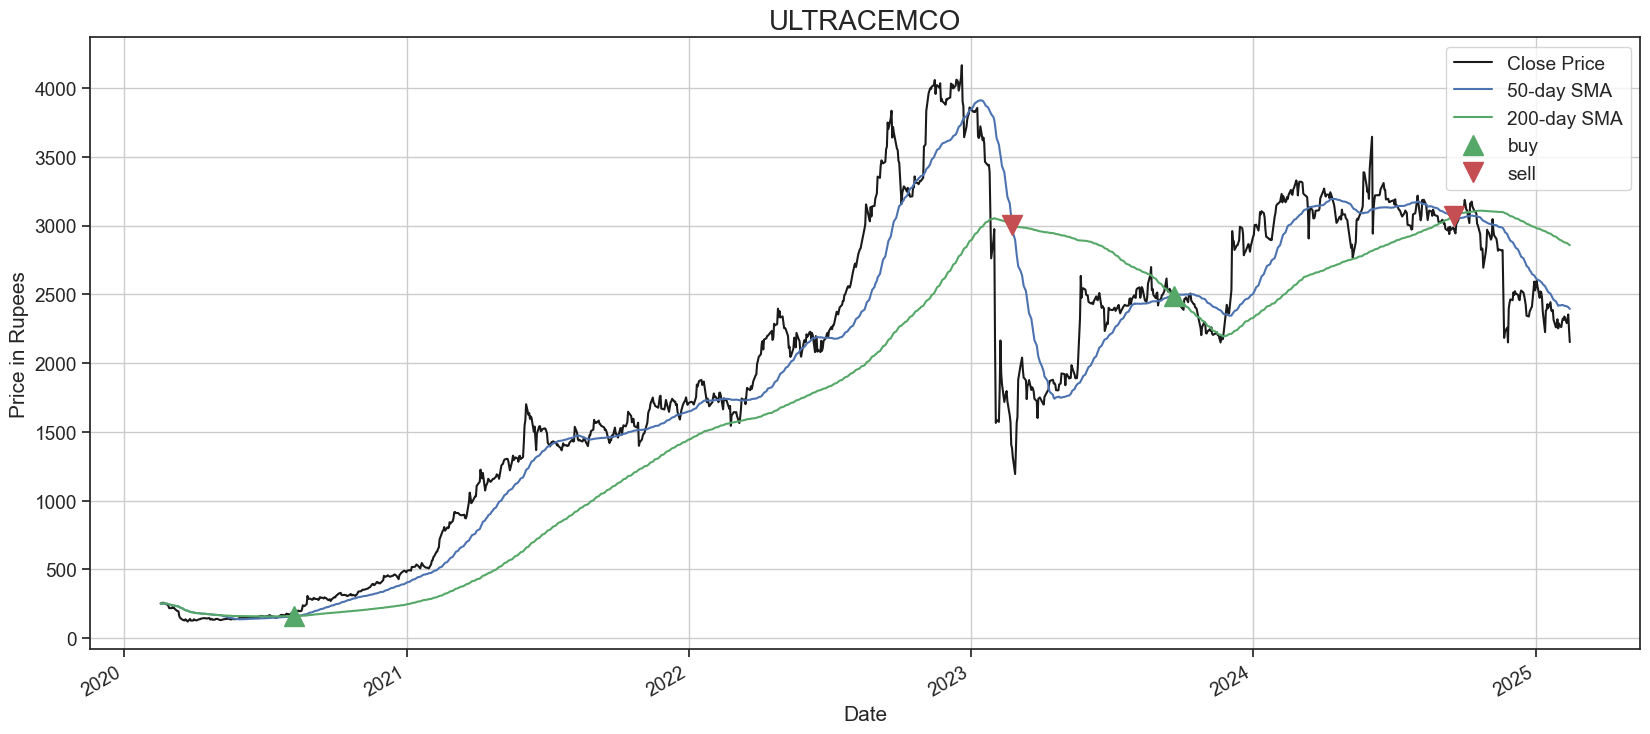

In [53]:
# create 20 days simple moving average column
df['50_SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
df['200_SMA'] = df['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df['Signal'] = 0.0
df['Signal'] = np.where(df['50_SMA'] > df['200_SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()
plt.figure(figsize = (20,9))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['50_SMA'].plot(color = 'b',label = '50-day SMA') 
df['200_SMA'].plot(color = 'g', label = '200-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, df['50_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, df['200_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

#### **Mathematical Intution**

* The crossover points are where ***the two moving averages intersect***. These points represent potential buy or sell signals for the stock, depending on the direction of the crossover.

* Mathematically, we can calculate the moving averages as follows:

**Simple Moving Average = Sum of stock prices over the period / Number of periods**

* We can then compare the 50-day and 200-day moving averages using the following 

**Strategy:**
1. **If 50-day moving average > 200-day moving average, it is a bullish signal**

2. **If 50-day moving average < 200-day moving average, it is a bearish signal.**

The crossover points occur when the two moving averages intersect. At this point, the direction of the crossover will determine whether it is a potential buy or sell signal for the stock.

<br>



### **Exponential Moving Average Technical Indicator**

* The **exponential moving average (EMA)** is a type of moving average that gives ***greater weight to more recent data in the time series, while also taking into account older data.*** The EMA is calculated using a smoothing factor that places a greater weight on recent data points. ***This can make it more responsive to price changes compared to a simple moving average (SMA).***

* Below, we calculated the 50-day EMA and plotted it along with the closing price of ADANIENT.NS. We also **added buying and selling signals based on the crossover of the EMA with the closing price.** ***When the closing price crosses above the EMA, it is considered a buying signal, and when the closing price crosses below the EMA, it is considered a selling signal***.

* As we can see from the plot, the **EMA generally tracks the closing price quite closely.** ***We can also see that there are several instances where the buying and selling signals are generated***, indicating potential opportunities to enter or exit the market.

* **It's important to note that this is just one of many technical indicators that can be used to analyze stock prices, and it should be used in conjunction with other indicators and fundamental analysis to make informed trading decisions.**

<br>

* ***The formula for calculating exponential moving average (EMA) is as follows:***

 **EMA = (Close - EMA_prev) * multiplier + EMA_prev**
<br>

 ***Where:***

* Close is the current closing price of the asset
* **EMA_prev** is the previous period's EMA
multiplier is a smoothing factor that determines the weight of the current period's price in the calculation. 
* **The formula for calculating the multiplier is: 2 / (N + 1), where N is the number of periods in the EMA.**





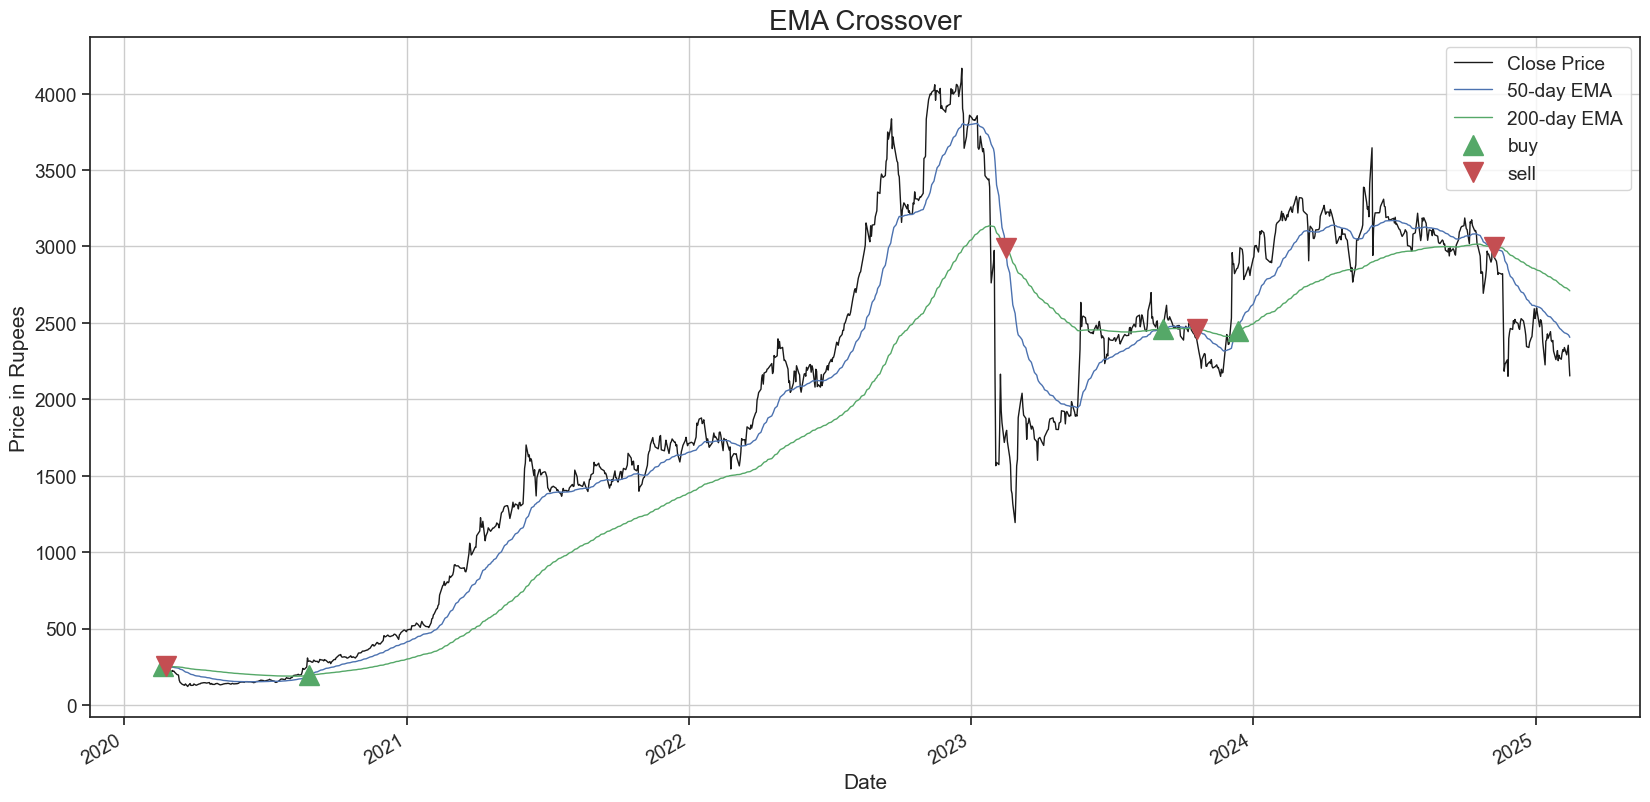

In [93]:
# Create 50 days exponential moving average column
df['50_EMA'] = df['Close'].ewm(span = 50, adjust = False).mean()
# Create 200 days exponential moving average column
df['200_EMA'] = df['Close'].ewm(span = 200, adjust = False).mean()
# create a new column 'Signal' such that if 50-day EMA is greater   # than 200-day EMA then set Signal as 1 else 0
df['Signal'] = 0.0  
df['Signal'] = np.where(df['50_EMA'] > df['200_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
df['Position'] = df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['50_EMA'].plot(color = 'b', lw = 1, label = '50-day EMA') 
df['200_EMA'].plot(color = 'g', lw = 1, label = '200-day EMA')
# plot 'buy' and 'sell' signals
plt.plot(df[df['Position'] == 1].index, df['50_EMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, df['200_EMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

**After calculating the initial EMA value, we can use the following formula to calculate the EMA for the next period:**

* **EMA[today] = (Price[today] - EMA[yesterday]) * (2 / (1 + N)) + EMA[yesterday]**

**Strategy:**
* If 50-day moving average > 200-day moving average, it is a bullish signal
* If 50-day moving average < 200-day moving average, it is a bearish signal.

### **Observations**

* This code will plot a graph with the stock price, EMA, buy signals as green triangles, and sell signals as red triangles. The buy and sell signals are determined by comparing the EMA with the stock price.

***Some insights that we can gather from this graph include:***

* The stock price seems to follow the EMA closely, indicating that the EMA is a good indicator of the stock's trend.
* The buy and sell signals can be used to time the trades, as they indicate when the stock price is expected to rise or fall.
* There are some false signals in the buy and sell signals, which may result in losses if acted upon. 
* Therefore, it's important to use these signals in conjunction with other indicators and perform thorough analysis before making any trading decisions.

### **MACD Technical Indicator**
* The Moving Average Convergence Divergence (MACD) indicator is one of the most popular technical oscillator indicators.
* It helps us understand the relationship between the moving averages. Convergent is when the lines move closer to each other and divergence is when the lines move away from each other. The lines here are the moving averages.
* MACD is a trend-following momentum indicator. It can help us assess the relationship between two moving averages of prices. Subsequently, the MACD indicator can be used to compute a trading strategy that signals us when to buy or sell a stock. 
* Before I begin, it's worth mentioning that a moving average is a rolling average value of a predefined historic period. As an instance, the simple 10-day moving average is computed by calculating the average of the past 10 days period. The exponential moving average, on the other hand, assigns higher importance to the recent values. It can help us capture the movements of a stock price better.


---


* **Three main steps to calculate MACD:** 
* Step 1: Calculate the MACD line:
  * Calculate the 26-day exponentially weighted moving average of the price. This is the long term line.
  * Calculate the 12-day exponentially weighted moving average of the price. This is the short term line.
  * Calculate the difference between the 26-day EMA and 12-day EMA lines. This is the MACD line.
* Step 2: Calculate the Signal line from the MACD line:
  * Calculate the 9 days exponentially weighted moving average of the MACD line. This is known as the signal line.
* Step 3: Compute the histogram: Distance between MACD and the Signal
  * We can then calculate the difference between the MACD and the Signal line and then plot it as a histogram. The histogram can help us find when the cross-over is about to happen.

* ***The histogram is the difference between MACD and the Signal line***


* The histogram's length can be used to understand the trend better. When the histogram bars are not increasing then it can imply that the prices are not volatile and a big move might happen in the opposite direction soon.

* Although the usual approach is to use the parameters as described above but it really depends on the stock, the market, and the investor. We can choose different parameters and optimize the parameters that meet our trading style and the stock we are interested in.


---


**Strategy:**
* We can use the cross-over between MACD and the Signal line to create a simple trading strategy. This is where the MACD line and the signal line cross over each other.
  * Sell Signal: The cross over: When the MACD line is below the signal line.
  * Buy Signal: The cross over: When the MACD line is above the signal line

**Bullish vs Bearish:**
  * Bearish: When the MACD and Signal lines are below 0 then the market is bearish.
  * Bullish: When the MACD and Signal lines are above 0 then the market is bullish.

---

**Key Points**
* MACD is based on moving averages which imply that the past can impact the future. This is not always true. Additionally, there is a lag present due to the moving averages hence the generated signals are after the move has started.

* The standard setting for MACD is the difference between the 12- and 26-period EMAs. We could use MACD(5,35,5) for more sensitive stocks and MACD(12,26,9) might be better suited for weekly charts. It all depends on the investor.

* One keynote to remember is to always analyze the short and long-term price trend along with other factors. And rememeber sometimes a stock that might appear overbought might still move upwards due to other market factors.

In [94]:
!pip install ta==0.10.2

In [58]:
from ta.trend import MACD

In [95]:
def generate_buy_sell_signals(condition_buy, condition_sell, dataframe, strategy):
    last_signal = None
    indicators = []
    buy = []
    sell = []
    for i in range(0, len(dataframe)):
        # if buy condition is true and last signal was not Buy
        if condition_buy(i, dataframe) and last_signal != 'Buy':
            last_signal = 'Buy'
            indicators.append(last_signal)
            buy.append(dataframe['Close'].iloc[i])
            sell.append(np.nan)
        # if sell condition is true and last signal was Buy
        elif condition_sell(i, dataframe)  and last_signal == 'Buy':
            last_signal = 'Sell'
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(dataframe['Close'].iloc[i])
        else:
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(np.nan)

    dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
    dataframe[f"{strategy}_Indicator"] = np.array(indicators)
    dataframe[f"{strategy}_Buy"] = np.array(buy)
    dataframe[f"{strategy}_Sell"] = np.array(sell)

In [96]:
def get_macd(company):
    close_prices = company['Close']
    window_slow = 26
    signal = 9
    window_fast = 12
    macd = MACD(close_prices, window_slow, window_fast, signal)
    company['MACD'] = macd.macd()
    company['MACD_Histogram'] = macd.macd_diff()
    company['MACD_Signal'] = macd.macd_signal()

    generate_buy_sell_signals(
    lambda x, company: company['MACD'].values[x] < company['MACD_Signal'].iloc[x],
    lambda x, company: company['MACD'].values[x] > company['MACD_Signal'].iloc[x],
    company,
    'MACD')
    return company

In [97]:
def plot_price_and_signals(fig, company, data, strategy, axs):
    last_signal_val = data[f"{strategy}_Last_Signal"].values[-1]
    last_signal = 'Unknown' if not last_signal_val else last_signal_val
    title = f'Close Price Buy/Sell Signals using {strategy}.  Last Signal: {last_signal}'
    fig.suptitle(f'Top: ADANI Stock Price. Bottom: {strategy}')

    if not data[f'{strategy}_Buy'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
    if not data[f'{strategy}_Sell'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
    axs[0].plot(company['Close'], label='Close Price', color='blue', alpha=0.35)

    plt.xticks(rotation=45)
    axs[0].set_title(title)
    axs[0].set_xlabel('Date', fontsize=20)
    axs[0].set_ylabel('Close Price', fontsize=18)
    axs[0].legend(loc='upper left')
    axs[0].grid()

C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\2639171393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['MACD'] = macd.macd()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\2639171393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['MACD_Histogram'] = macd.macd_diff()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\2639171393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

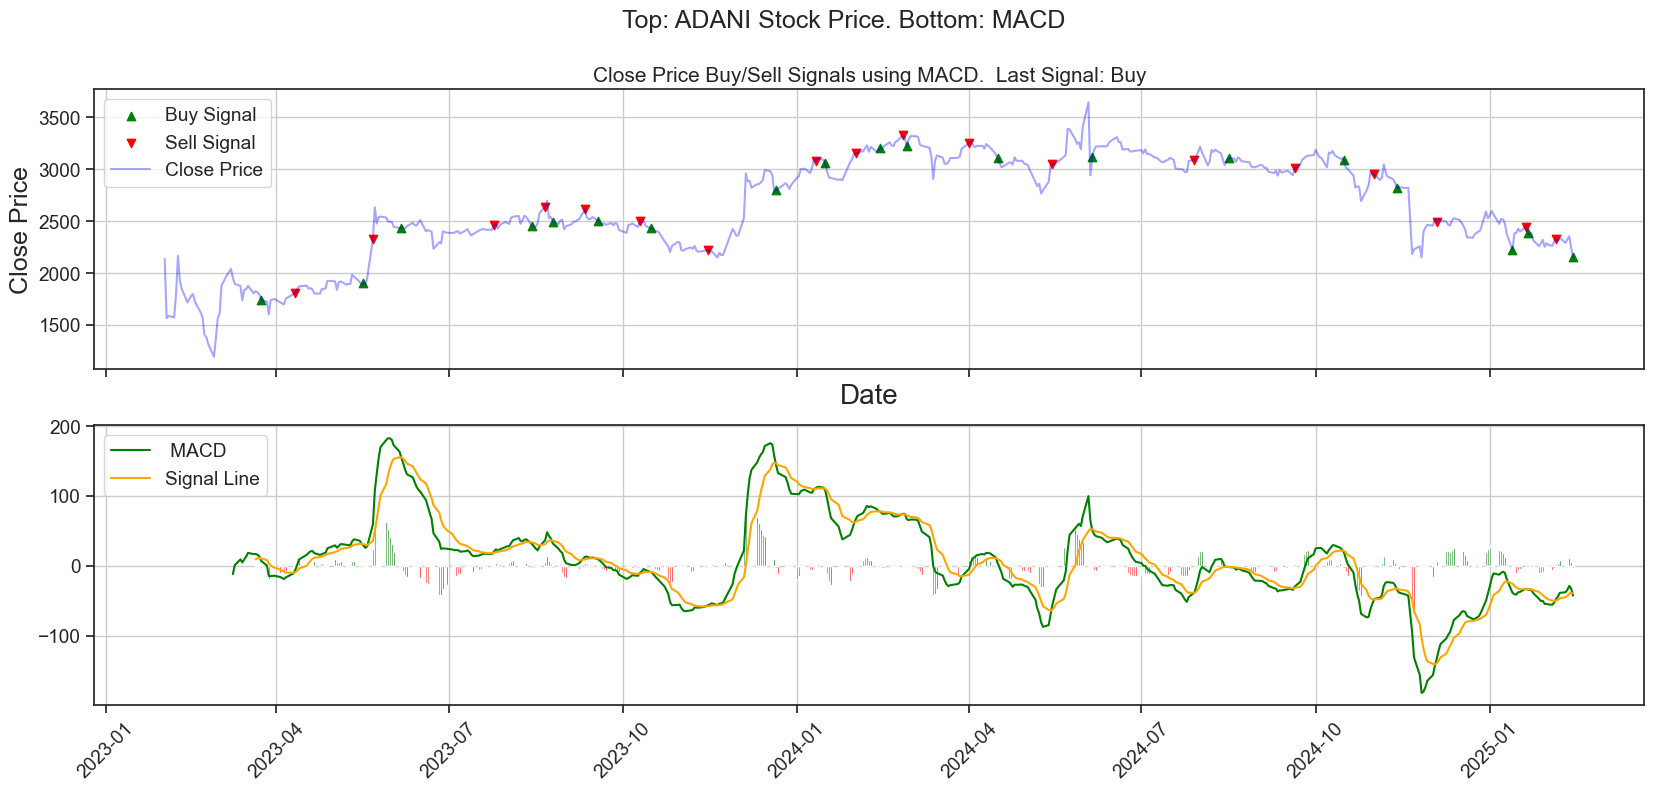

In [98]:
def plot_macd(company):
    macd = company
    # Create and plot the graph
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,8))
    plot_price_and_signals(fig, company, macd, 'MACD', axs)

    axs[1].plot(macd['MACD'], label=' MACD', color = 'green')
    axs[1].plot(macd['MACD_Signal'], label='Signal Line', color='orange')
    positive = macd['MACD_Histogram'][(macd['MACD_Histogram'] >= 0)]
    negative = macd['MACD_Histogram'][(macd['MACD_Histogram'] < 0)]
    axs[1].bar(positive.index, positive, color='green')
    axs[1].bar(negative.index, negative, color='red')    
    axs[1].legend(loc='upper left')
    axs[1].grid()
    # print(os.path.abspath(image))
    plt.show()
plot_macd(get_macd(df.iloc[-504:]))

### **RSI Technical Indicator**
* RSI stands for Relative Strength Index. It's a widely used technical indicator and this is mainly due to its simplicity. It relies on the market and we can use the indicator to determine when to buy or sell a stock.

* RSI requires us to compute the recent gains and losses. The recent specified time period is subjective in nature. We use the RSI indicator to measure the speed and change of price movements.

* RSI is an oscillating indicator. It can help us understand the momentum better. Note, momentum is the change of price and size. Therefore, the RSI indicator can help us understand when the stock price will change its trend.

* The key to using this indicator is to understand whether a stock is overbought or oversold.

---

**Calculation:**
* The calculation is extremely simple.

  * Firstly, we have to determine the time period. Usually, a 14 day time period is chosen but it could depend on the investor's own view of the market and the stock.
  * Secondly, we have to compute the relative strength which is known as RS. RS is the average gain over the average loss. To explain it further, RS is the average gain when the price was moving up over the average loss when the price change was negative.
  * Calculate RSI as 100 — (100/(1+RS))
  * The RSI value is between 0–100
---
**Strategy:**
* **Overbought:** When the RSI is above 70%. Essentially, overbought is when the price of a stock has increased quickly over a small period of time, implying that it is overbought.
* The price of an overbought stock usually decreases in price.
* **Oversold:** When the RSI is below 30%. Essentially, oversold is when the price of a stock has decreased quickly over a small period of time, implying that it is oversold. The price of an oversold stock usually increases in price.

* There are way too many strategies that are dependent on the RSI indicator.

* A simple strategy is to use the RSI such that:

* **Sell:** When RSI increases above 70%

* **Buy:** When RSI decreases below 30%.

* We might decide to use different parameters. The point is that we can optimize the parameters that meet our trading style, the market and the stock we are interested in.

---

**Key Points**
* The signals are not always accurate. The RSI signals are dependent on the price of the stock only and this is not the only factor that can change the price of a stock. Plus it's highly subjective.

* As an instance, a company can launch a product when a stock is oversold and that could further increase the price of the stock.

* Therefore, always consider the market factors and also use the short and long term price trend when buying or selling a stock.

In [99]:
from ta.momentum import RSIIndicator
# from ta.volatility import BollingerBands

def get_rsi(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators
    rsi_time_period = 20

    rsi_indicator = RSIIndicator(close_prices, rsi_time_period)
    company['RSI'] = rsi_indicator.rsi()

    low_rsi = 40
    high_rsi = 70

    generate_buy_sell_signals(
        lambda x, company: company['RSI'].values[x] < low_rsi,
        lambda x, company: company['RSI'].values[x] > high_rsi,
    company, 'RSI')

    return company

C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3053028527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['RSI'] = rsi_indicator.rsi()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3163564876.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3163564876.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

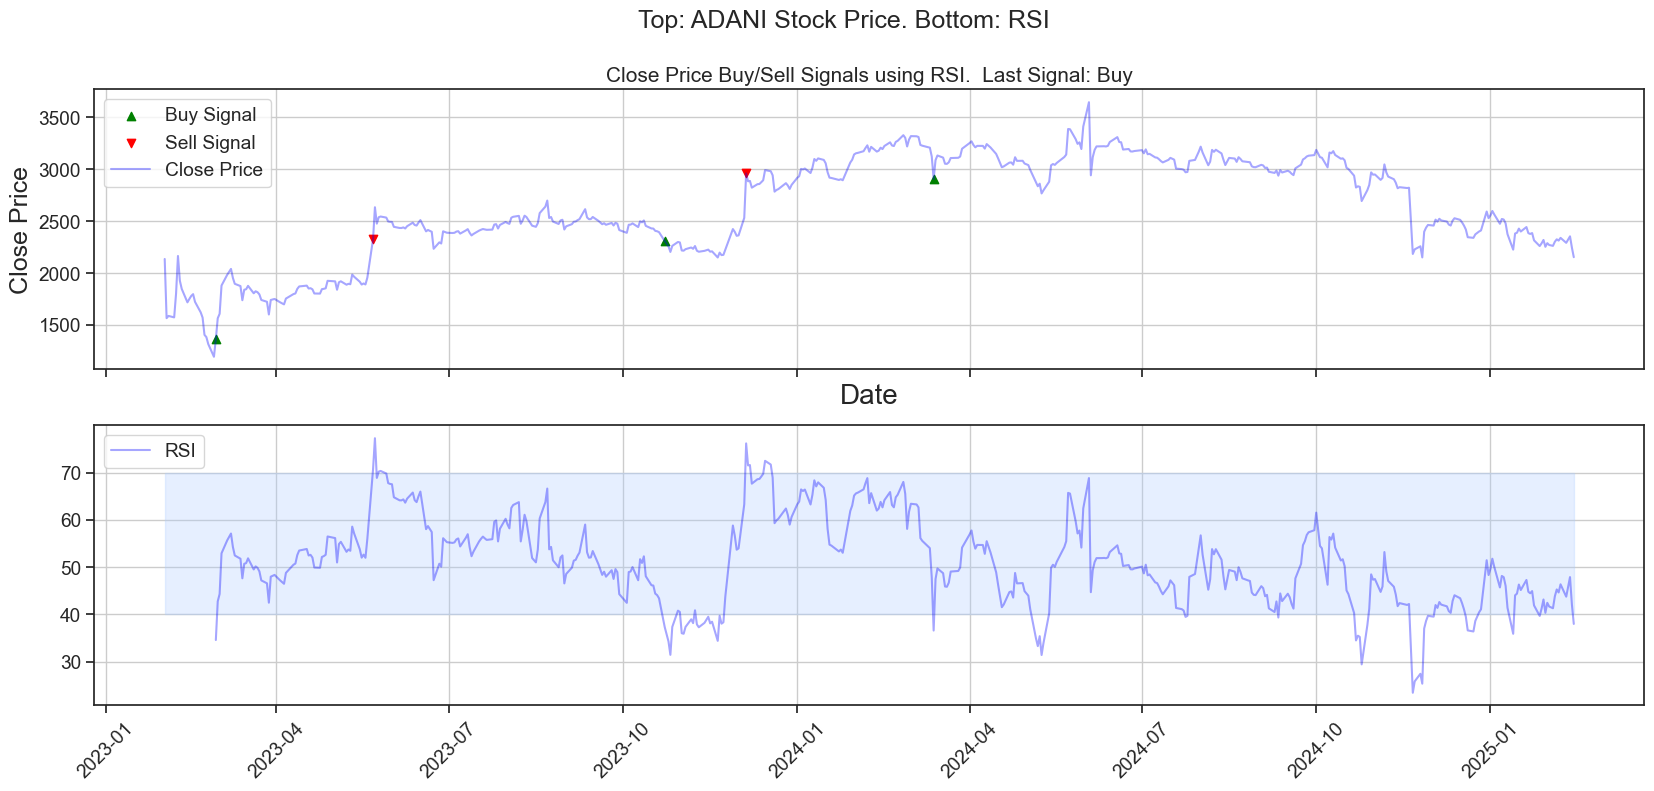

In [100]:
def plot_rsi(company):
      # image = f'images/{company.symbol}_rsi.png'
      rsi = company
      low_rsi = 40
      high_rsi = 70

      #plt.style.use('default')
      fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
      plot_price_and_signals(fig, company, rsi, 'RSI', axs)
      axs[1].fill_between(rsi.index, y1=low_rsi, y2=high_rsi, color='#adccff', alpha=0.3)
      axs[1].plot(rsi['RSI'], label='RSI', color='blue', alpha=0.35)
      axs[1].legend(loc='upper left')
      axs[1].grid()
      plt.show()
plot_rsi(get_rsi(df.iloc[-504:]))

### **Bollinger Bands Technical Indicator**
* It is one of the most popular technical indicators. And this is mainly due to its simplicity.

* There are two main components of a Bollinder band indicator:
  1. Volatility Bolinger Bands
  2. Moving averages
---
* **Essentially, the steps are:**
  * Middle band: Calculate the moving average of the price, usually 20 days moving average.
  * Upper band: Calculate two standard deviations above the moving average.
  * Lower band: Calculate two standard deviations below the moving average.

* The more volatile the stock prices, the wider the bands from the moving average. It's important to look at the shape/trend of the bands along with the gap between them to understand the trend and stock better.

* The standard deviations capture the volatile movements and hence we compute standard deviations above and below the upper and lower bands to capture the outliers. Consequently, 95% of the price movements will fall between the two standard deviations
---
* **Strategy:**
* A simple trading strategy could be to:
  * Sell: As soon as the market price touches the upper Bollinger band
  * Buy: As soon as the market price touches the lower Bollinger band

* This is based on the assumption that the stock must fall back (from the uptrend) and eventually touch the bottom band.
* At times, the Bollinger Band Indicator signals us to buy a stock but an external market event such as negative news can change the price of the stock. Therefore it's important to use the indicator as just an indicator that can sometimes be wrong.

In [102]:
from ta.volatility import BollingerBands
def get_bollinger_bands(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators

    window = 20
    indicator_bb = BollingerBands(close=close_prices, window=window, window_dev=2)

    # Add Bollinger Bands features
    company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
    company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
    company['Bollinger_Bands_Lower'] = indicator_bb.bollinger_lband()

    generate_buy_sell_signals(
        lambda x, company: company['Close'].values[x] < company['Bollinger_Bands_Lower'].values[x],
        lambda x, company: company['Close'].values[x] > company['Bollinger_Bands_Upper'].values[x],
        company, 'Bollinger_Bands')

    return company

C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

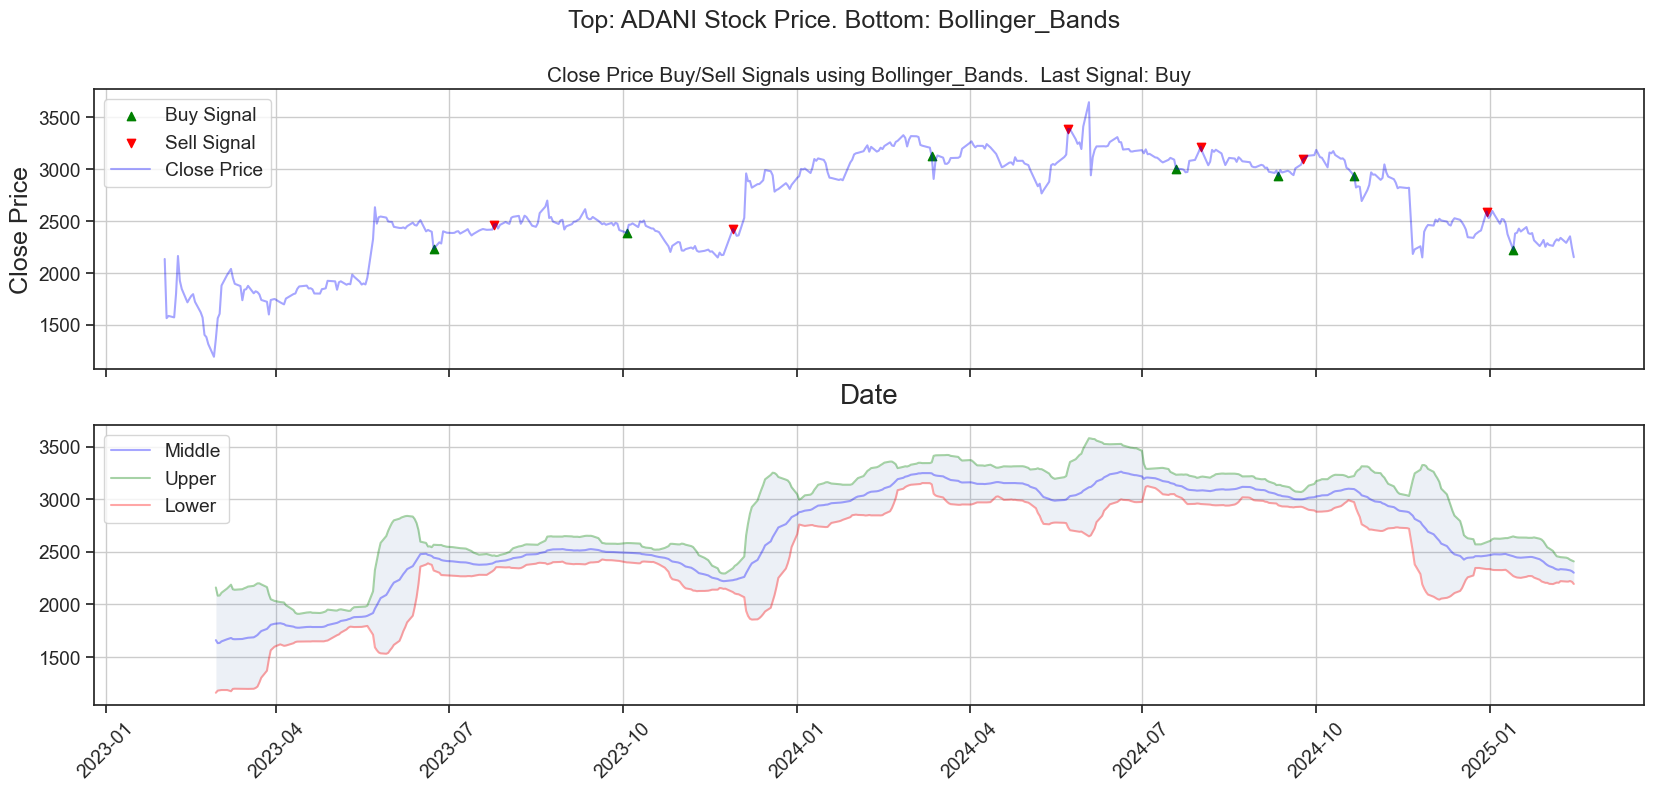

In [64]:
def plot_bollinger_bands(company):
        # image = f'images/{company.symbol}_bb.png'
        bollinger_bands = company

        fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
        plot_price_and_signals(fig, company, bollinger_bands, 'Bollinger_Bands', axs)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Middle'], label='Middle', color='blue', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Upper'], label='Upper', color='green', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Lower'], label='Lower', color='red', alpha=0.35)
        axs[1].fill_between(bollinger_bands.index, bollinger_bands['Bollinger_Bands_Lower'], bollinger_bands['Bollinger_Bands_Upper'], alpha=0.1)
        axs[1].legend(loc='upper left')
        axs[1].grid()

        plt.show()
plot_bollinger_bands(get_bollinger_bands(df.iloc[-504:]))

* The library has a bonus function. We can add all of the available technical indicators that have been coded in the ta library by calling the add_all_ta_features function.

* For this code to work, create a dataframe and ensure it contains the Open, High, Low and Close columns.

In [65]:
# df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC", fillna=True)

**Conclusion**
* The signals generated by the technical indicators are theoretical in nature. * There is no guarantee that the signals are going to be absolutely applicable all the time. Plus the market can behave in an unexpected manner.
* Investors can lose some, if not all, of their investments therefore the indicators should be used wisely. It's important to note that stock investment should not be taken lightly. On top of that, the market can not always be timed.
* Usually, the technical indicators are combined together to achieve a better indicator. As an instance, the Bollinger band and MACD indicators can be combined with the RSI measure to better decide whether it is the right time to buy/sell.
* It is important to adjust the parameters and decide the optimum trading strategy based on your view of the market, your trading style, and the investment stock. Always backtest the trading strategy.

## **Fundamental Analysis**
* There are thousands of publicly listed companies. We can choose to invest our money in all of them but some of the companies are better for our investment than the others.
* There are a large number of methodologies available to analyze and measure the health of a company.
* One of the key methodologies is known as fundamental analysis.
* Fundamental analysis is when an analyst values a stock of a company by assessing the company-level factors such as the state of its balance sheet, market capitalization, how the management of the company is, and so on.
* The fundamental analysis helps us understand what to look for in a company. The result of fundamental analysis is a set of fundamental indicators.
* Therefore, the fundamental analysis uses both the intrinsic value of the stock along with the external factors to compute its value.
* The more we understand about the company we want to invest in, the higher the chances of us deriving the true value of the company.

**Quick Note Worth Mentioning**
* If we know that a company is healthy, it is investing its income to grow itself and is launching new products, its net income is more than its costs and its management is effective, it does not have any debt and the share price is undervalued then we can feel confident that the value of the company is likely to grow and the company won't go bankrupt anytime soon.
* No one can accurately predict the stock market. The market can be volatile and it can change due to an unlimited number of factors.
* I have presented my opinions in this article. This article does not guarantee any positive returns and should be used for educational purposes only. The opinions expressed in the article may change without notice as new information is obtained.
* An investor can lose some, if not all, of his/her investments therefore it is important to seek a professional's advice before investing money in a company.
* The stock market cannot always be timed and there is no guarantee that an investor will earn a profit.
* The key concept to understand is that each company has its intrinsic value. The fundamental analysis is all about calculating the intrinsic value of the company. This analysis is subjective in nature. There are way too many indicators available and a mix of them can help us value a company.


**Basic Understanding**
* The fundamental analysis should help us understand the following key questions:
  1. What is the market capitalization of a company? Is the company growing and earning profits?
  2. Is my target company under debt? What is their debt-to-equity ratio?
  3. Is the company undervalued or overvalued in terms of its market and book value, sales, earnings, and profits?
  4. What is their price per earnings and price per earnings growth ratios?
  5. What are the returns on assets and equities? What is the dividend payout ratio?
* There are a large number of useful fundamental indicators such as dividend yield, EPS, and so on

In [70]:
list_of_companies = ["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"]
PS_ratios = {"ADANIENT.NS" : 1.37, "TATASTEEL.NS" : 0.55, "PAGEIND.NS" : 8.74, "EICHERMOT.NS": 6.47 , "INFY.NS":4.63}
PE_ratios = {"ADANIENT.NS" : 92.2, "TATASTEEL.NS" : 7.82, "PAGEIND.NS" : 63.1, "EICHERMOT.NS": 34.2, "INFY.NS":27.7}
PEG_ratios = {"ADANIENT.NS" : -28.8, "TATASTEEL.NS": 0.10 , "PAGEIND.NS" : 4.19, "EICHERMOT.NS": 228, "INFY.NS":3.02}
PB_ratios = {"ADANIENT.NS" : 5.68, "TATASTEEL.NS" : 1.29, "PAGEIND.NS" : 32.8, "EICHERMOT.NS": 6.74, "INFY.NS":8.92}
ROA_ratios = {"ADANIENT.NS" : "1.03%", "TATASTEEL.NS" : "15.8%", "PAGEIND.NS" : "28.2%" , "EICHERMOT.NS": "10.9%" , "INFY.NS":"19.6%"}
Current_Ratio_ratios = {"ADANIENT.NS" : 0.89, "TATASTEEL.NS" : 0.90 , "PAGEIND.NS" : 1.77 , "EICHERMOT.NS": 1.71 , "INFY.NS":1.76}
Operating_Margins_ratios = {"ADANIENT.NS" : "4.98%", "TATASTEEL.NS" : "16.1%" , "PAGEIND.NS" : "20.2%" , "EICHERMOT.NS": "23.6%", "INFY.NS":"24%"}
ROE_ratios = {"ADANIENT.NS" : "4.12%", "TATASTEEL.NS" : "42.6%" , "PAGEIND.NS" : "54.4%", "EICHERMOT.NS": "14%" , "INFY.NS": "29%"}
# Cash_Per_Share = {"ADANIENT.NS" : 1.37, "TATASTEEL.NS" : , "PAGEIND.NS" : , "EICHERMOT.NS": , "INFY.NS":}
D_S_Ratio_ratios = {"ADANIENT.NS" : 1.31, "TATASTEEL.NS" : 0.81, "PAGEIND.NS" : 0.12, "EICHERMOT.NS": 0.01, "INFY.NS":0.1}
Payout_Ratio_ratios = {"ADANIENT.NS" : "14.2%", "TATASTEEL.NS" : "15.5%", "PAGEIND.NS" : "76.9%" , "EICHERMOT.NS": "34.2%", "INFY.NS":"58.8%"}

### **Valuation measures**
#### **Market Capitalization:**
* Let's start by understanding what market capitalization is. Market capitalization is also known as market cap. The market cap is one of the measures to determine the size of a company. We can use the market cap measure to categorize a company into a large, medium, or small-sized company category.
* The market capital figure informs us about the market value of a company which is simply the product of outstanding shares and the current price of one share. Therefore, we can use the market cap figure to estimate how valuable the company is to the market.
* Usually, large-cap companies have a market cap greater than $10Billion, the medium is anywhere from $2B to $10B and the small-cap is anywhere below $2B.
We can further break the cap down into more categories if needed. Generally, it's wise to diversify the portfolio and add a mix of large, medium, and small-cap companies' stocks in the portfolio.

* Author's Opinion: The smaller cap stocks are generally riskier and are more volatile than the large market cap companies. The large-cap companies yield fewer returns than the small-cap companies but they are generally safer investments.

In [71]:
# import yfinance as yf
adanient = yf.Ticker("ADANIENT.NS")
marketCap = adanient.fast_info['marketCap']
marketCap

2484717607394.5

#### **PS Ratio**
* The P/S ratio, which is also known as the Price To Sales Ratio, is used to inform about how much the market capitalization exceeds the sales of a company. Typically, past 12 months sales are used.
* It is essentially the ratio of market capitalization to the sales of a company. Therefore, the ratio can help us understand how much the other investors are paying for one dollar of sales of stock.
* The ratio is computed by dividing the market capitalization of the share by the total sales of a company. Therefore, as the number of outstanding shares or the share price of a company increases, the ratio increases. If the sales of a company decrease then the ratio increases.
* Author's Opinion: The key point to take is that if the ratio is lower than 1 then the company is undervalued and if the ratio is greater than 1 then the company is overvalued. Generally, the higher the value, the more the stock is valued by the investors.

In [72]:
# PS = adanient.info['priceToSalesTrailing12Months']
PS = PS_ratios["ADANIENT.NS"]
PS

1.37

#### **PE Ratio**
* The Price to Earnings ratio is one of the most used ratios within the fundamental analysis measures. It can help us determine whether the company is over or undervalued with respect to other companies within the industry.
* There are multiple ways to calculate the ratio. We can either take the market capitalization and divide it by the earnings or we can take the current share price and divide by the Earnings Per Share (EPS). The earnings per share inform us how much the company makes per share. It is merely the total earnings of a company divided by the outstanding shares. If the EPS is positive then the company is profitable. Therefore it makes more than it costs.
* PE ratio is the Trailing Price To Earning ratio. The word trailing here refers to the earnings of the last 12 months. Essentially, we take the market capitalization and divide it by the actual last 12 month's earnings per share. We can use the PE ratios to compare similar companies within an industry and to determine whether the company stock price is over or undervalued.
* A company with a higher PE ratio usually has a higher earnings growth rate.
* Author's Opinion: The key point to take is that PE needs to be compared with the companies within the same industry. The higher the value, the more the company is valued.

In [73]:
# PE = adanient.info['trailingPE']
PE = PE_ratios["ADANIENT.NS"]
PE

92.2

#### **PEG ratio**
* The PEG ratio is also known as the Price To Earnings Ratio Over Earnings Growth Rate. This is computed by calculating the PE ratio and dividing by the earnings growth. We can use the annual earnings growth rate.
* We can use the PEG ratio to compute the true value of a stock. The lower the PEG ratio, the undervalue the stock is. The PEG ratio can help us understand how fast a company can grow.
* The higher the PEG ratio, the more the company is valued, therefore the lower the value, the undervalue the company is. When both the PE and PEG ratios are high then they are good indicators that the company is overvalued.

In [74]:
# PEG = adanient.info['pegRatio']
PEG = PEG_ratios["ADANIENT.NS"]
PEG

-28.8

#### **PB Ratio = Price/Book Ratio**
* The price to book ratio is computed by taking the market capitalization and dividing it by the book value of the company. We can also compute it by taking the current share price and dividing it by the book value per share.
* The book value is the difference between the assets and liabilities. Imagine if all of the assets of a company are liquidated to pay all of the liabilities then whatever we are left with is known as book value. The market value on the other hand is the price that the market values the company as.
* Author's Opinion: The key point to take is that if the ratio is lower than 1 then the company is undervalued and if the ratio is higher than 1 then it is overvalued. The higher the value, the more the company is valued. We should ensure that the book value and market value of a company are positive. Generally, the lower the ratio, the better the investment

In [75]:
# PB = adanient.info['priceToBook']
PB = PB_ratios["ADANIENT.NS"]
PB

5.68

### **Management Effectiveness**
#### **ROA**
* Each company has its assets, liabilities, and annual net income that it generates from the assets. The ROA stands for Return On Assets.
The ROA measure informs us about the income the company can generate from its assets.
  * $ROA = \frac{Net Income}{Average Assets}$ 
* Therefore if a company has effective management then it will be reflected in the ROA.
* Author's Opinion: The higher the ROA value, the more effective the management of a company because the more the company can possibly generate more net income from its assets.

In [76]:
# ROA = adanient.info['returnOnAssets']
ROA = ROA_ratios["ADANIENT.NS"]
ROA

'1.03%'

#### **ROE**
* The ROE stands for Return On Equity.
* Remember that shareholder equity, or commonly known as equity, is the difference between the assets and the liabilities of a company.
*  $ROA = \frac{Net Income}{shareholder equity}$ 
* This is again an indicator of how efficient the management of a company is. It informs us about the returns of a company in relation to the equity held by its stockholders.
* Author's Opinion: The higher the value, the better the company in generating returns.

In [77]:
# ROE = adanient.info['returnOnEquity']
ROE = ROE_ratios["ADANIENT.NS"]
ROE

'4.12%'

### **Income Statement**
#### **Profit Margin**
* Profit margin is an important measure as it helps us understand the degree to which the company is generating income over its revenue. It is the ratio of the net income of a company over its revenue.
* Therefore, if a company generates less income than its revenue then it will have a lower profit margin. It is a measure of a company's efficiency.
These figures are available in the income statement of a company.
* Author's Opinion: A company that generates a higher profit margin generates higher income when compared to its expenses and therefore is considered a healthier company.

In [103]:
profitMargins = adanient.info['profitMargins']
profitMargins

- ADANIENT.NS: No summary info found, symbol may be delisted


TypeError: 'NoneType' object is not subscriptable

### **Operating Margin**
* The operating margin is another measure of profit.
* It is calculated by dividing the operating profit by the sales revenue. The profit is computed by calculating the difference between the revenue and all of the costs of a company.
* These figures are available in the income statement of a company.
Author's Opinion: We might be able to conclude that the higher the operating margin, the profitable the company with lower costs.

In [78]:
# operatingMargins = adanient.info['operatingMargins']
operatingMargins = Operating_Margins_ratios["ADANIENT.NS"]
operatingMargins

'4.98%'

### **Balance Sheet & Dividends**
#### **Current Ratio**
* The current ratio is one of the important balance sheet ratios to consider  
* It is a liquidity ratio and can inform us about the health of a company. It indicates whether the company can pay off its short-term debt.
* It is calculated by dividing the current assets over the current liabilities.
* The key to remember is that the higher the current ratio, the better the company can be considered for investment.
* It is a good indication to invest in a company that has higher assets than its liabilities.
* Author's Opinion: Ideally, the current ratio should be greater than 1 indicating that it can pay-off its liabilities without borrowing the money.

In [79]:
# currentRatio = adanient.info['currentRatio']
currentRatio = Current_Ratio_ratios["ADANIENT.NS"]
currentRatio

0.89

#### **Cash Per Share**
* This is the available cash over the number of outstanding shares.
* Author's Opinion: The more cash there is in a company, the more the business can spend on itself and make positive changes for the shareholders by growing the company or its products as an instance.

In [54]:
# totalCashPerShare = adanient.info['totalCashPerShare']
# totalCashPerShare

#### **D/S Ratio = Total Debt/Equity Ratio**
* This measure is calculated by taking the ratio of liabilities of a company by the equity of the company.
* Remember the equity of a company is the difference between its assets and liabilities. Therefore, a positive number is considered healthier.
* Author's Opinion: Companies that have a higher debt ratio can potentially default on their debt therefore it's wise to choose a company with lower debt to equity ratio and ensuring that it is a positive number.

In [80]:
# debtToEquity = adanient.info['debtToEquity']
debtToEquity = D_S_Ratio_ratios["ADANIENT.NS"] 
debtToEquity

1.31

#### **Payout Ratio**
* The payout ratio is directly related to the dividends that the company pays to its shareholders. Some of the most established companies pay a percentage of their earnings to their shareholders.
* The payout ratio is calculated by dividing the dividend amount per share by the earnings per share.
* Some companies do not pay dividends whereas some companies invest a large portion of their income back into their business. When the payout ratio is low then it could mean that the company is investing back into its business. This again could imply, that the company is expanding.
* Author's Opinion: When the payout ratio is high (higher than 100) then it means the company is paying more in dividends than its earnings.

In [81]:
# payoutRatio = adanient.info['payoutRatio']
payoutRatio = Payout_Ratio_ratios["ADANIENT.NS"]
payoutRatio

'14.2%'

**Resource**
* https://towardsdatascience.com/data-analysis-visualization-in-finance-technical-analysis-of-stocks-using-python-269d535598e4
* https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a
* https://medium.com/fintechexplained/automating-stock-investing-technical-analysis-with-python-81c669e360b2
* https://medium.com/fintechexplained/speaking-traders-language-14a22df720a6
* https://medium.com/fintechexplained/automating-stock-investing-fundamental-analysis-with-python-f854781ee0b4
* https://www.investopedia.com/terms/t/todayslow.asp
* https://technical-analysis-library-in-python.readthedocs.io/en/latest/

**Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("ADANIENT.NS")

# get all stock info (slow)
adanient.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```

In [ ]:
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Streamlit app title
st.title("📈 Stock Price Prediction using LSTM")

# User input for stock ticker
ticker = st.text_input("Enter Stock Ticker Symbol (e.g., AAPL, TSLA):", "AAPL")

# Fetch historical data
def load_data(ticker):
    df = yf.download(ticker, start="2020-01-01", end="2024-01-01")
    return df

st.write(f"Fetching data for **{ticker}**...")
df = load_data(ticker)
st.write(df.tail())  # Display last few rows

# Plot historical closing price
st.subheader("📊 Historical Stock Price")
fig, ax = plt.subplots()
ax.plot(df["Close"], label="Close Price", color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.legend()
st.pyplot(fig)

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1))

# Prepare training data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 50
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
st.write("🛠️ Training the LSTM model... (this may take a few minutes)")
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot predicted prices
st.subheader("🔮 Predicted Stock Prices")
fig2, ax2 = plt.subplots()
ax2.plot(df.index[train_size+seq_length:], predicted_prices, label="Predicted Price", color="red")
ax2.plot(df.index[train_size+seq_length:], df["Close"].iloc[train_size+seq_length:], label="Actual Price", color="blue")
ax2.set_xlabel("Date")
ax2.set_ylabel("Price (USD)")
ax2.legend()
st.pyplot(fig2)

st.success("✅ Stock price prediction completed!")


[*********************100%***********************]  1 of 1 completed


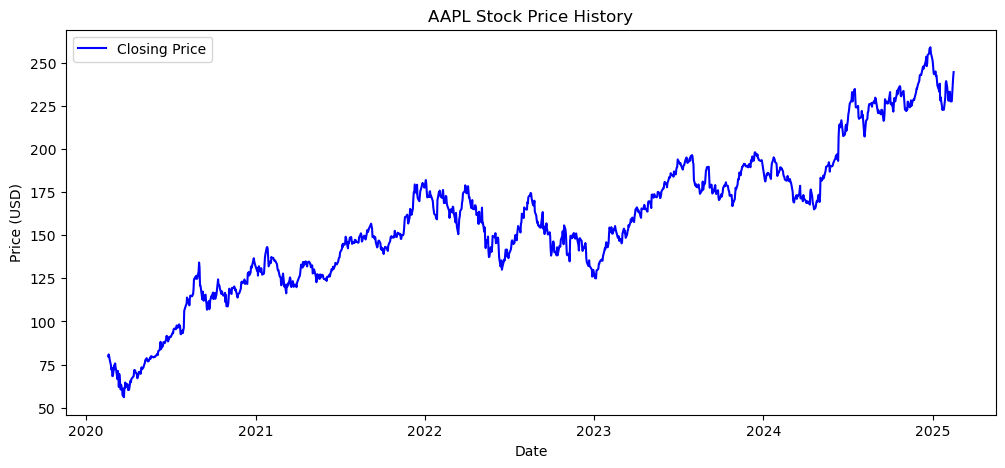



Training the LSTM model...
Epoch 1/5

30/30 [==============================] - 16s 85ms/step - loss: 0.0236
Epoch 2/5
30/30 [==============================] - 2s 81ms/step - loss: 0.0048
Epoch 3/5
30/30 [==============================] - 2s 82ms/step - loss: 0.0033
Epoch 4/5
30/30 [==============================] - 2s 78ms/step - loss: 0.0027
Epoch 5/5
7/7 [==============================] - 3s 32ms/step


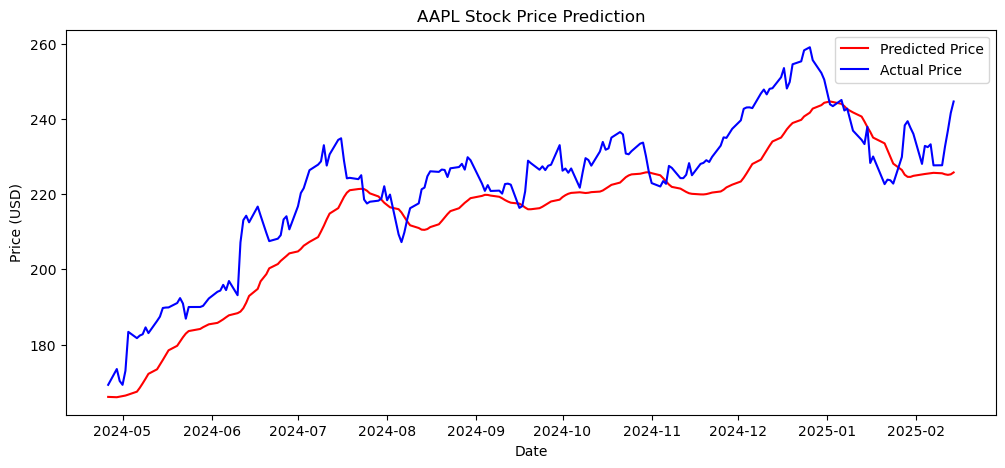

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Step 1: Fetch Stock Data with Fixes
ticker = "AAPL"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years' data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

# Plot historical stock prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.title(f"{ticker} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1))

# Split into training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 50
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Step 3: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
print("Training the LSTM model...")
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Step 4: Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to actual prices

# Step 5: Plot Predictions vs Actual Data
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size+seq_length:], predicted_prices, label="Predicted Price", color="red")
plt.plot(df.index[train_size+seq_length:], df["Close"].iloc[train_size+seq_length:], label="Actual Price", color="blue")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


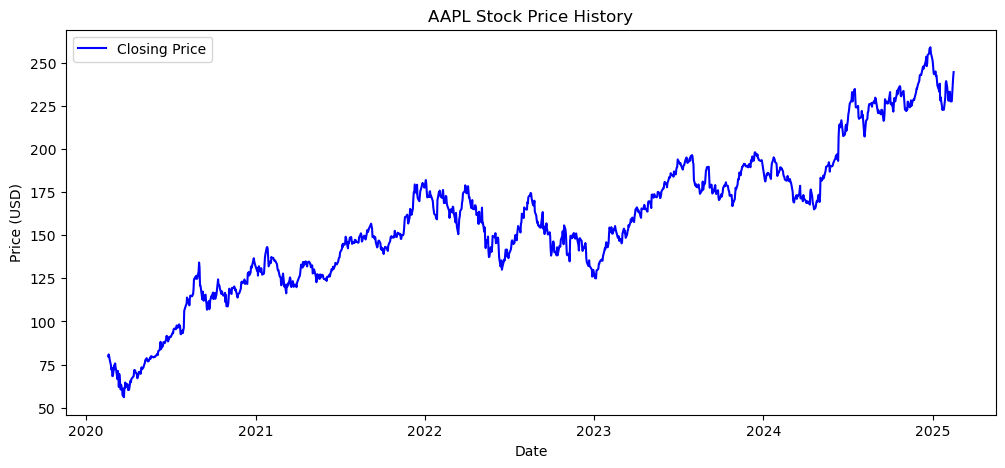

C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

RMSE: 37.75471269374368


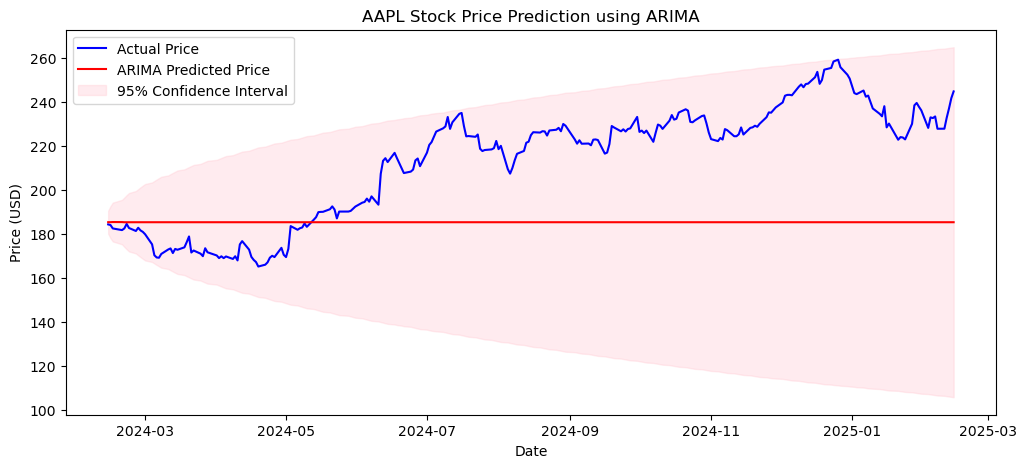

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Step 1: Fetch Stock Data
ticker = "AAPL"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years of data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

# Plot historical stock prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.title(f"{ticker} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 2: Data Preprocessing
df = df[['Close']]
df.dropna(inplace=True)

# Split into training and testing datasets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 3: Train ARIMA Model
order = (5,1,0)  # ARIMA(p,d,q) - Change this if needed
model = ARIMA(train, order=order)
model_fit = model.fit()

# Step 4: Make Predictions
forecast = model_fit.forecast(steps=len(test))  
conf_int = model_fit.get_forecast(steps=len(test)).conf_int()

# Step 5: Evaluate Performance
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Step 6: Plot Predictions vs Actual Data
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size:], test, label="Actual Price", color="blue")
plt.plot(df.index[train_size:], forecast, label="ARIMA Predicted Price", color="red")
plt.fill_between(df.index[train_size:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label="95% Confidence Interval")
plt.title(f"{ticker} Stock Price Prediction using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


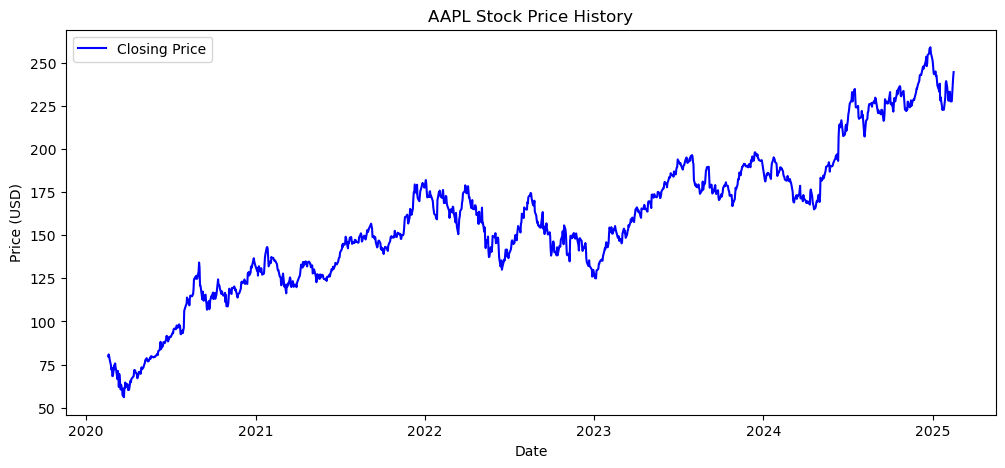


Checking Stationarity for Raw Closing Prices:
ADF Test Results:
ADF Statistic: -1.0134614692831485
p-value: 0.7483229303667416
Critical Values:
   1%: -3.4355671297788666
   5%: -2.8638438984080117
   10%: -2.5679966213893057

❌ The time series is NOT stationary (p > 0.05). Differencing is required.

Checking Stationarity for Differenced Closing Prices:
ADF Test Results:
ADF Statistic: -35.815124129482406
p-value: 0.0
Critical Values:
   1%: -3.435571295403709
   5%: -2.863845736356174
   10%: -2.567997600196822

✅ The time series is stationary (p < 0.05). No differencing needed.


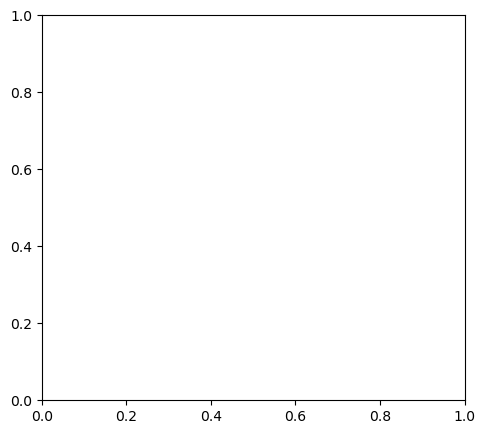

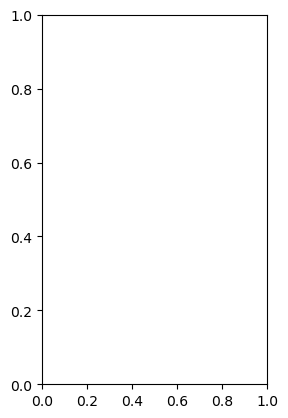

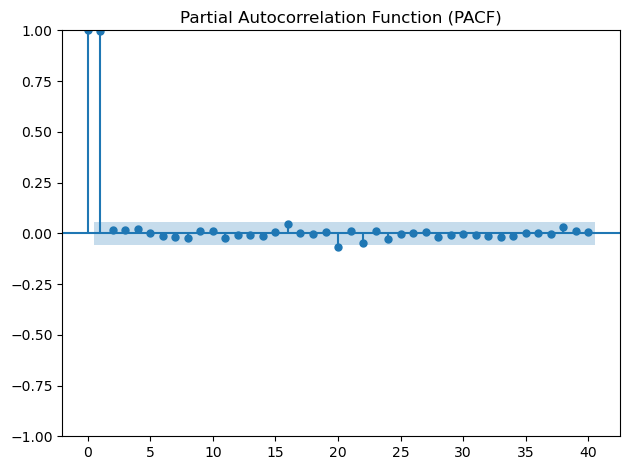

C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge


📊 Model Performance Metrics:
   MSE  (Mean Squared Error)      : 1425.4183
   RMSE (Root Mean Squared Error) : 37.7547
   MAE  (Mean Absolute Error)     : 32.8623


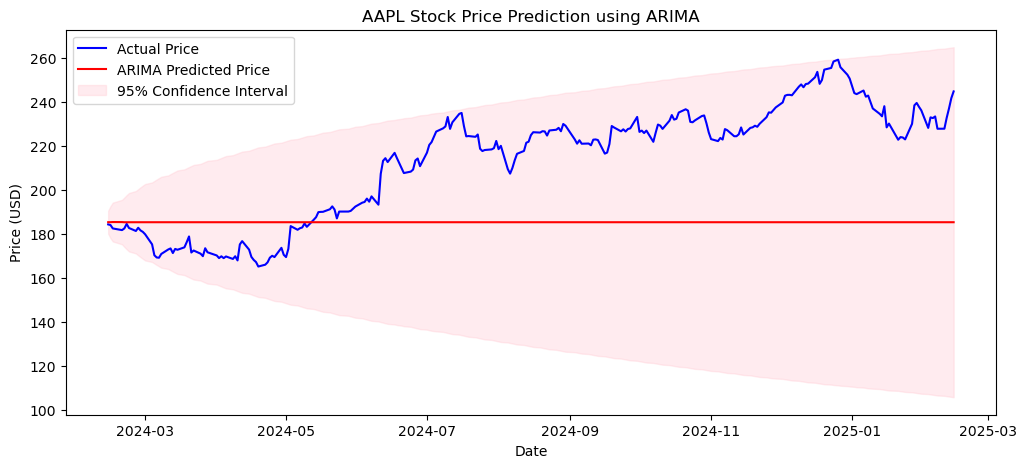

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Fetch Stock Data
ticker = "AAPL"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years of data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

# Convert index to datetime (if not already)
df.index = pd.to_datetime(df.index)

# Plot historical stock prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.title(f"{ticker} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 2: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] < 0.05:
        print("\n✅ The time series is stationary (p < 0.05). No differencing needed.")
    else:
        print("\n❌ The time series is NOT stationary (p > 0.05). Differencing is required.")

print("\nChecking Stationarity for Raw Closing Prices:")
check_stationarity(df["Close"])

# Apply first-order differencing if non-stationary
df["Close_diff"] = df["Close"].diff().dropna()

print("\nChecking Stationarity for Differenced Closing Prices:")
check_stationarity(df["Close_diff"].dropna())

# Step 3: Correlation Analysis (Autocorrelation & Partial Autocorrelation)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df["Close"].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(df["Close"].dropna(), lags=40)
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

# Step 4: Train-Test Split
df = df[['Close']]
df.dropna(inplace=True)

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 5: Train ARIMA Model (p,d,q based on ADF test & ACF/PACF)
order = (5,1,0)  # ARIMA(p,d,q) - Adjust based on ADF/ACF/PACF analysis
model = ARIMA(train, order=order)
model_fit = model.fit()

# Step 6: Make Predictions
forecast = model_fit.forecast(steps=len(test))  
conf_int = model_fit.get_forecast(steps=len(test)).conf_int()

# Step 7: Evaluate Performance
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print("\n📊 Model Performance Metrics:")
print(f"   MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"   RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"   MAE  (Mean Absolute Error)     : {mae:.4f}")

# Step 8: Plot Predictions vs Actual Data
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size:], test, label="Actual Price", color="blue")
plt.plot(df.index[train_size:], forecast, label="ARIMA Predicted Price", color="red")
plt.fill_between(df.index[train_size:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label="95% Confidence Interval")
plt.title(f"{ticker} Stock Price Prediction using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


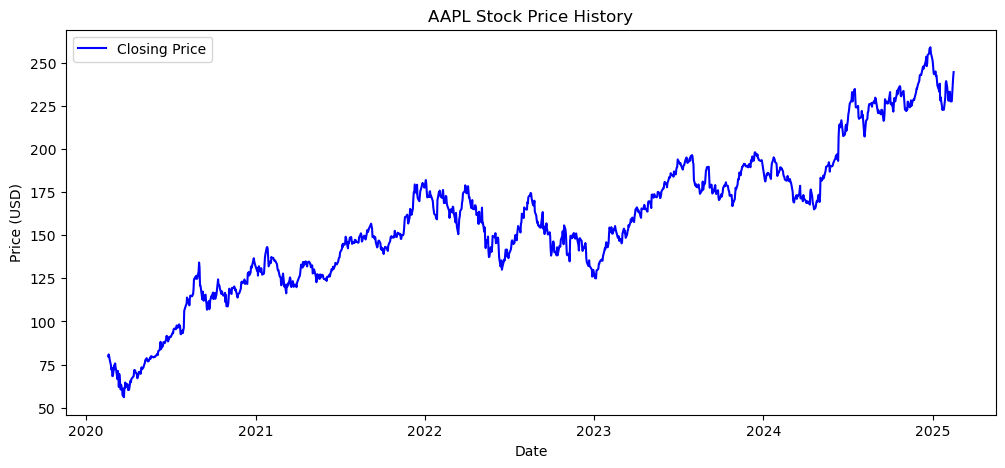


Checking Stationarity for Raw Closing Prices:

ADF Test Results:
ADF Statistic: -1.0134614692831485
p-value: 0.7483229303667416
Critical Values:
   1%: -3.4355671297788666
   5%: -2.8638438984080117
   10%: -2.5679966213893057

❌ The time series is NOT stationary (p > 0.05). Differencing is required.

Checking Stationarity for Differenced Closing Prices:

ADF Test Results:
ADF Statistic: -35.815124129482406
p-value: 0.0
Critical Values:
   1%: -3.435571295403709
   5%: -2.863845736356174
   10%: -2.567997600196822

✅ The time series is stationary (p < 0.05). No differencing needed.


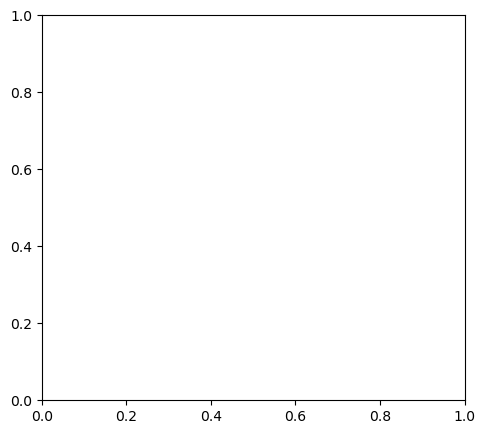

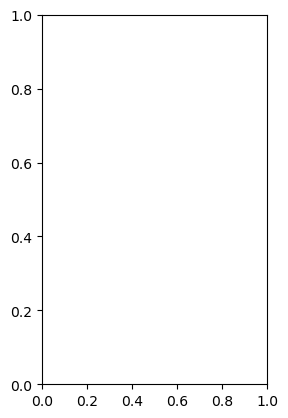

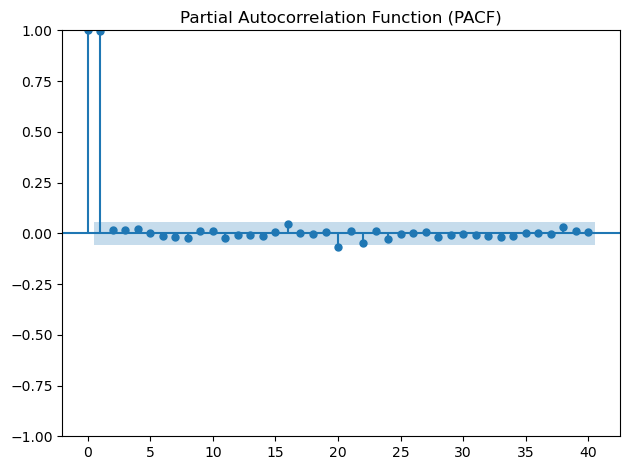

C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind


📊 Model Performance Metrics:
   MSE  (Mean Squared Error)      : 560.7059
   RMSE (Root Mean Squared Error) : 23.6792
   MAE  (Mean Absolute Error)     : 21.2207


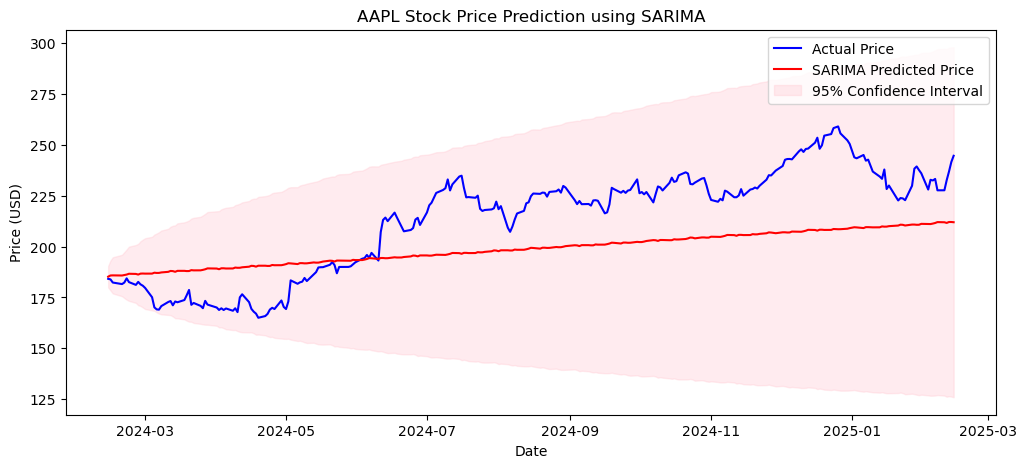

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Fetch Stock Data
ticker = "AAPL"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years of data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

# Convert index to datetime (if not already)
df.index = pd.to_datetime(df.index)

# Plot historical stock prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Closing Price", color="blue")
plt.title(f"{ticker} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Step 2: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] < 0.05:
        print("\n✅ The time series is stationary (p < 0.05). No differencing needed.")
    else:
        print("\n❌ The time series is NOT stationary (p > 0.05). Differencing is required.")

print("\nChecking Stationarity for Raw Closing Prices:")
check_stationarity(df["Close"])

# Apply first-order differencing if non-stationary
df["Close_diff"] = df["Close"].diff().dropna()

print("\nChecking Stationarity for Differenced Closing Prices:")
check_stationarity(df["Close_diff"].dropna())

# Step 3: Correlation Analysis (Autocorrelation & Partial Autocorrelation)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df["Close"].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(df["Close"].dropna(), lags=40)
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

# Step 4: Train-Test Split
df = df[['Close']]
df.dropna(inplace=True)

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 5: Train SARIMA Model (p,d,q)(P,D,Q,s) based on ADF, ACF, and PACF
seasonality = 12  # Monthly seasonality (adjust as needed)
order = (5,1,0)    # Non-seasonal ARIMA(p,d,q)
seasonal_order = (1,1,1,seasonality)  # Seasonal SARIMA(P,D,Q,s)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Step 6: Make Predictions
forecast = model_fit.forecast(steps=len(test))  
conf_int = model_fit.get_forecast(steps=len(test)).conf_int()

# Step 7: Evaluate Performance
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print("\n📊 Model Performance Metrics:")
print(f"   MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"   RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"   MAE  (Mean Absolute Error)     : {mae:.4f}")

# Step 8: Plot Predictions vs Actual Data
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size:], test, label="Actual Price", color="blue")
plt.plot(df.index[train_size:], forecast, label="SARIMA Predicted Price", color="red")
plt.fill_between(df.index[train_size:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label="95% Confidence Interval")
plt.title(f"{ticker} Stock Price Prediction using SARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [17]:
!pip install yfinance pandas numpy scikit-learn xgboost statsmodels tensorflow matplotlib

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.4/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 0.7/124.9 MB 4.6 MB/s eta 0:00:27
   ---------------------------------------- 0.9/124.9 MB 4.9 MB/s eta 0:00:26
   ---------------------------------------- 1.2/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 1.6/124.9 MB 5.6 MB/s eta 0:00:22
    --------------------------------------- 2.0/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.4/124.9 MB 6.3 MB/s eta 0:00:20
    -----------------------

[*********************100%***********************]  1 of 1 completed
6/6 [==============================] - 1s 15ms/step

ARIMA Performance Metrics:
RMSE: 0.1065
MAE: 0.0744
R2 Score: -0.6883

SARIMA Performance Metrics:
RMSE: 0.2053
MAE: 0.1622
R2 Score: -5.2782

LSTM Performance Metrics:
RMSE: 0.0319
MAE: 0.0209
R2 Score: 0.8629

XGBoost Performance Metrics:
RMSE: 0.0279
MAE: 0.0176
R2 Score: 0.8948


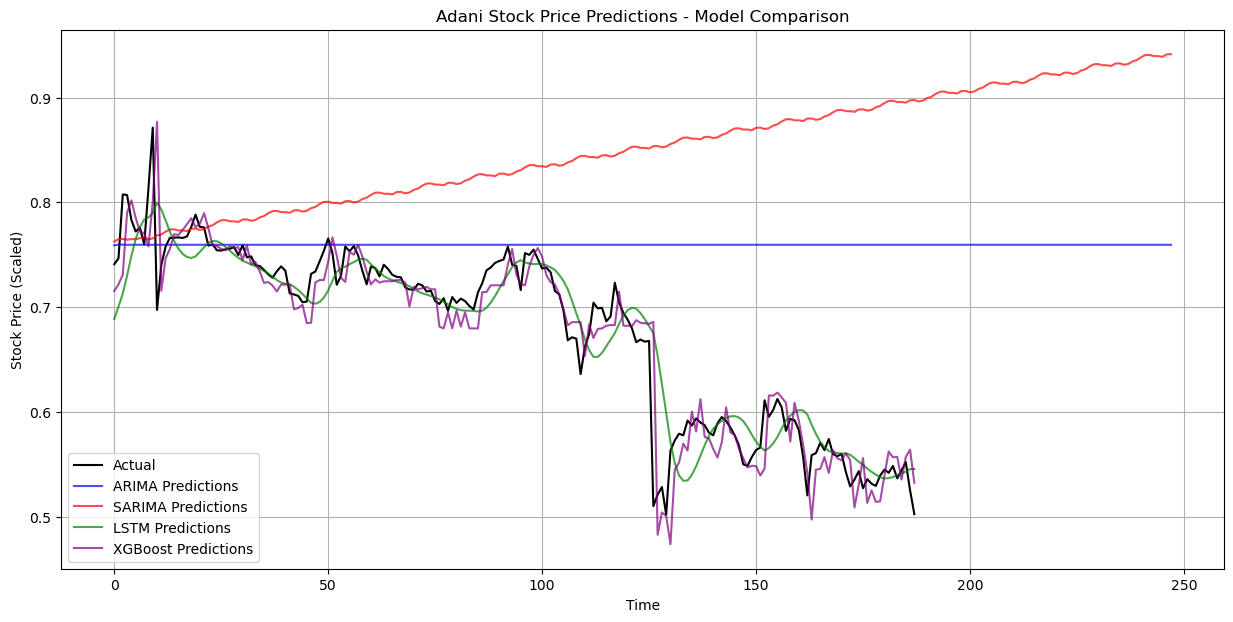

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_data(ticker="ADANIENT.NS", period="5y"):
    try:
        df = yf.download(ticker, period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("Stock data is unavailable for this period.")
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def prepare_data(df, feature='Close', train_size=0.8):
    data = df[feature].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    train_size = int(len(data_scaled) * train_size)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]
    
    return train_data, test_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

def predict_arima(train_data, test_data):
    model = ARIMA(train_data, order=(5,1,2))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_sarima(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_lstm(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    predictions = model.predict(X_test)
    return predictions, y_test

def predict_xgboost(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

def plot_predictions(actual, predictions_dict, title):
    plt.figure(figsize=(15, 7))
    plt.plot(actual, label='Actual', color='black')
    
    colors = ['blue', 'red', 'green', 'purple']
    for (model_name, predictions), color in zip(predictions_dict.items(), colors):
        plt.plot(predictions, label=f'{model_name} Predictions', color=color, alpha=0.7)
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Fetch data
    df = fetch_data()
    if df is None:
        return
    
    # Prepare data
    train_data, test_data, scaler = prepare_data(df)
    
    # ARIMA predictions
    arima_pred = predict_arima(train_data, test_data)
    
    # SARIMA predictions
    sarima_pred = predict_sarima(train_data, test_data)
    
    # LSTM predictions
    lstm_pred, lstm_actual = predict_lstm(train_data, test_data)
    
    # XGBoost predictions
    xgb_pred, xgb_actual = predict_xgboost(train_data, test_data)
    
    # Evaluate all models
    predictions_dict = {
        'ARIMA': arima_pred,
        'SARIMA': sarima_pred,
        'LSTM': lstm_pred.flatten(),
        'XGBoost': xgb_pred
    }
    
    # Calculate metrics for all models
    metrics = {}
    for model_name, predictions in predictions_dict.items():
        metrics[model_name] = evaluate_predictions(test_data[-len(predictions):], 
                                                predictions, 
                                                model_name)
    
    # Plot results
    plot_predictions(test_data[-len(xgb_pred):], predictions_dict,
                    'Adani Stock Price Predictions - Model Comparison')

if __name__ == "__main__":
    main()

Fetching TATA Motors stock data...
[*********************100%***********************]  1 of 1 completed
Data shape: (1240, 6)

First few rows of data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-14  172.000000  176.199997  168.300003  169.100006  168.056015   
2020-02-17  170.399994  171.350006  166.350006  169.100006  168.056015   
2020-02-18  168.000000  168.000000  158.600006  161.600006  160.602310   
2020-02-19  162.850006  164.600006  153.050003  158.050003  157.074219   
2020-02-20  157.949997  162.300003  156.000000  158.500000  157.521439   

              Volume  
Date                  
2020-02-14  56676430  
2020-02-17  32893274  
2020-02-18  52744122  
2020-02-19  78914233  
2020-02-20  54328194  

Training models...

Training ARIMA model...

Training SARIMA model...

Training LSTM model...
Epoch 1/100
30/30 [==============================] - 4s 64ms/step - loss: 

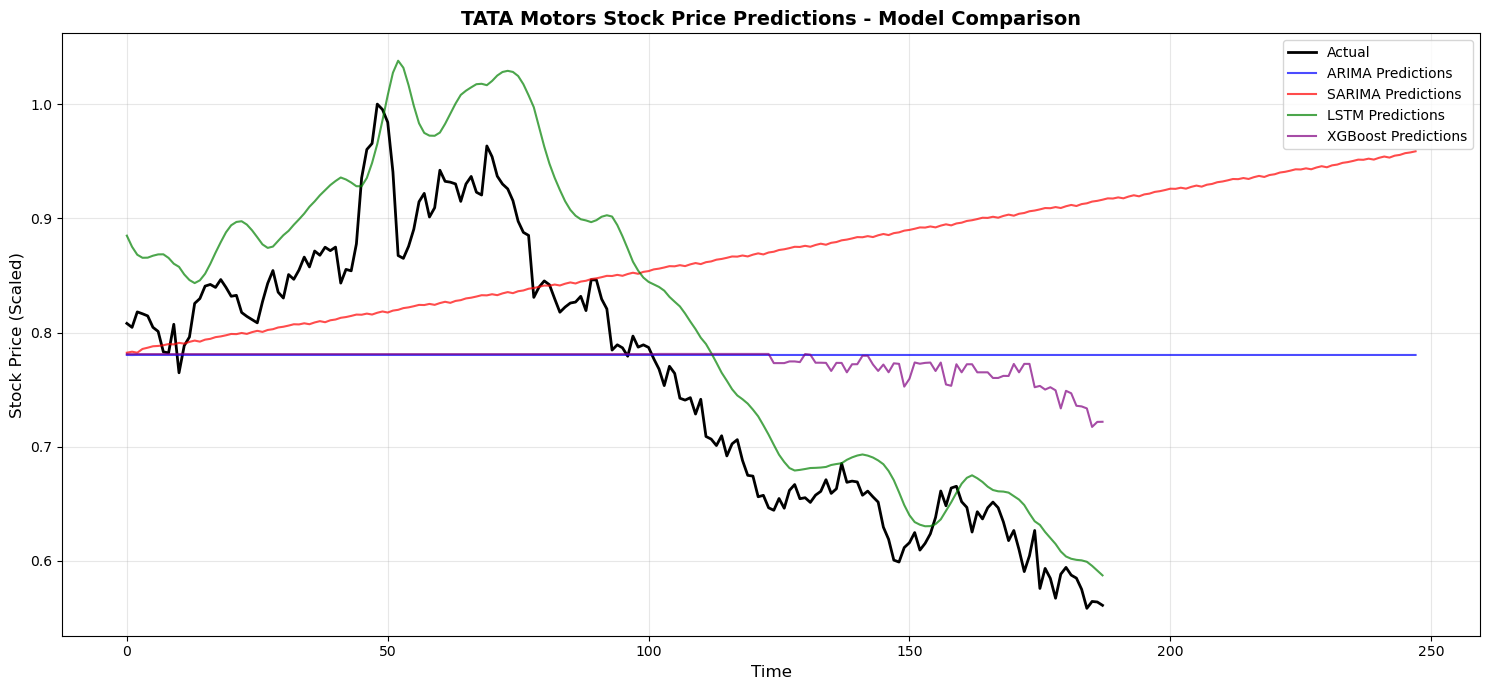


Best performing model for TATA Motors stock prediction: LSTM


In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_tata_data(period="5y"):
    try:
        # Using TATA Motors stock symbol
        df = yf.download("TATAMOTORS.NS", period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("TATA Motors stock data is unavailable for this period.")
        return df
    except Exception as e:
        print(f"Error fetching TATA Motors data: {e}")
        return None

def prepare_data(df, feature='Close', train_size=0.8):
    data = df[feature].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    train_size = int(len(data_scaled) * train_size)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]
    
    return train_data, test_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics for TATA Motors:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

def predict_arima(train_data, test_data):
    # Adjusted ARIMA parameters for TATA Motors data
    model = ARIMA(train_data, order=(2,1,2))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_sarima(train_data, test_data):
    # Adjusted seasonal parameters for TATA Motors data
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_lstm(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    model = Sequential([
        LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        Dropout(0.3),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    # Increased epochs for better learning
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
    
    predictions = model.predict(X_test)
    return predictions, y_test

def predict_xgboost(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Adjusted XGBoost parameters for TATA Motors data
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        min_child_weight=2
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

def plot_predictions(actual, predictions_dict, title):
    plt.figure(figsize=(15, 7))
    plt.plot(actual, label='Actual', color='black', linewidth=2)
    
    colors = ['blue', 'red', 'green', 'purple']
    for (model_name, predictions), color in zip(predictions_dict.items(), colors):
        plt.plot(predictions, label=f'{model_name} Predictions', color=color, alpha=0.7)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Stock Price (Scaled)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    # Fetch TATA Motors data
    print("Fetching TATA Motors stock data...")
    df = fetch_tata_data()
    if df is None:
        return
    
    print(f"Data shape: {df.shape}")
    print("\nFirst few rows of data:")
    print(df.head())
    
    # Prepare data
    train_data, test_data, scaler = prepare_data(df)
    
    print("\nTraining models...")
    
    # ARIMA predictions
    print("\nTraining ARIMA model...")
    arima_pred = predict_arima(train_data, test_data)
    
    # SARIMA predictions
    print("\nTraining SARIMA model...")
    sarima_pred = predict_sarima(train_data, test_data)
    
    # LSTM predictions
    print("\nTraining LSTM model...")
    lstm_pred, lstm_actual = predict_lstm(train_data, test_data)
    
    # XGBoost predictions
    print("\nTraining XGBoost model...")
    xgb_pred, xgb_actual = predict_xgboost(train_data, test_data)
    
    # Evaluate all models
    predictions_dict = {
        'ARIMA': arima_pred,
        'SARIMA': sarima_pred,
        'LSTM': lstm_pred.flatten(),
        'XGBoost': xgb_pred
    }
    
    print("\nEvaluating model performances...")
    # Calculate metrics for all models
    metrics = {}
    for model_name, predictions in predictions_dict.items():
        metrics[model_name] = evaluate_predictions(test_data[-len(predictions):], 
                                                predictions, 
                                                model_name)
    
    # Plot results
    plot_predictions(test_data[-len(xgb_pred):], predictions_dict,
                    'TATA Motors Stock Price Predictions - Model Comparison')
    
    # Print summary of best performing model
    best_model = min(metrics.items(), key=lambda x: x[1][0])[0]
    print(f"\nBest performing model for TATA Motors stock prediction: {best_model}")

if __name__ == "__main__":
    main()
    

[*********************100%***********************]  1 of 1 completed

ADF Test for Original Data:
ADF Statistic: -1.5707280051756172
p-value: 0.4982789926300793

ADF Test for :
ADF Statistic: -6.050307949152395
p-value: 1.2823059778634055e-07


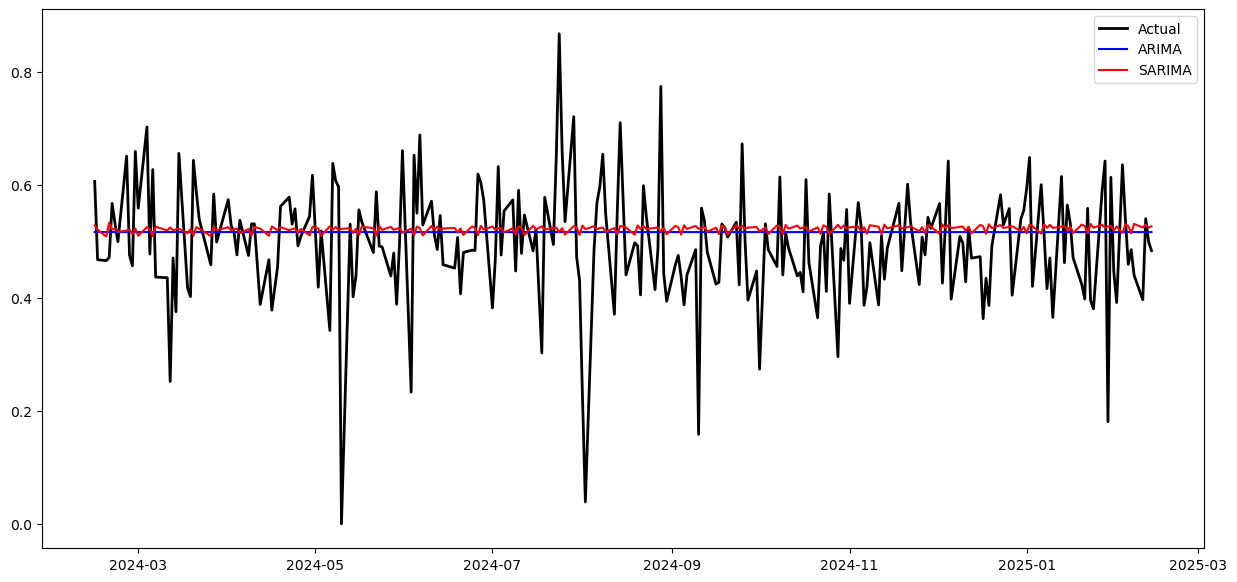

In [22]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


def check_stationarity(data, title=''):
    result = adfuller(data)
    print(f'\nADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < 0.05


def make_stationary(data):
    diff = pd.Series(data).diff().dropna()
    return diff if check_stationarity(diff) else diff.diff().dropna()


def fetch_tata_data(period="5y"):
    try:
        df = yf.download("TATAMOTORS.NS", period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("Stock data unavailable.")
        df['Date'] = df.index
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None


def prepare_data(df, feature='Close', train_size=0.8):
    dates = df['Date'].values
    data = df[feature].values.reshape(-1, 1)
    is_stationary = check_stationarity(data.flatten(), 'Original Data')
    if not is_stationary:
        data = make_stationary(data.flatten()).values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    train_size = int(len(data_scaled) * train_size)
    return (data_scaled[:train_size], data_scaled[train_size:], scaler, dates[:train_size], dates[train_size:])


def predict_arima(train_data, test_size):
    best_order = (1, 1, 1)
    try:
        model = ARIMA(train_data, order=best_order)
        results = model.fit()
        return results.forecast(steps=test_size)
    except Exception as e:
        print(f"ARIMA Model Error: {e}")
        return np.zeros(test_size)


def predict_sarima(train_data, test_size):
    best_order = (1, 1, 1)
    best_seasonal_order = (1, 1, 1, 12)
    try:
        model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
        results = model.fit()
        return results.forecast(steps=test_size)
    except Exception as e:
        print(f"SARIMA Model Error: {e}")
        return np.zeros(test_size)

def plot_predictions(actual_dates, actual_values, predictions_dict):
    actual_values = actual_values.ravel()  # Convert to 1D array
    actual_dates = actual_dates[:len(actual_values)]  # Trim dates if needed

    plt.figure(figsize=(15, 7))
    plt.plot(actual_dates, actual_values, label='Actual', color='black', linewidth=2)

    colors = ['blue', 'red']
    for (model_name, predictions), color in zip(predictions_dict.items(), colors):
        plt.plot(actual_dates, predictions, label=model_name, color=color)

    plt.legend()
    plt.show()

# def plot_predictions(actual_dates, actual_values, predictions_dict):
#     plt.figure(figsize=(15, 7))
#     plt.plot(actual_dates, actual_values, label='Actual', color='black', linewidth=2)
#     colors = ['blue', 'red']
#     for (model_name, predictions), color in zip(predictions_dict.items(), colors):
#         plt.plot(actual_dates[-len(predictions):], predictions, label=f'{model_name} Predictions', color=color)
#     plt.xlabel('Date')
#     plt.ylabel('Stock Price (Scaled)')
#     plt.legend()
#     plt.grid()
#     plt.show()


def main():
    df = fetch_tata_data()
    if df is None:
        return
    train_data, test_data, scaler, train_dates, test_dates = prepare_data(df)
    arima_pred = predict_arima(train_data, len(test_data))
    sarima_pred = predict_sarima(train_data, len(test_data))
    predictions_dict = {'ARIMA': arima_pred, 'SARIMA': sarima_pred}
    plot_predictions(test_dates, test_data, predictions_dict)


if __name__ == "__main__":
    main()


In [2]:
!pip install streamlit prophet yfinance plotly

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/b4/14/f330d47e1363c742e595605bc3575c880204901b3820dcb9e807ea49bcc8/holidays-0.66-py3-none-any.whl.metadata
  Using cached holidays-0.66-py3-none-any.whl.metadata (26 kB)
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -----------------------------

In [9]:
%%writefile stock.py
import streamlit as st
from datetime import date
import time
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go

# Define the date range
START = "2020-01-01"  # Reduced to avoid data issues
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Stock Forecast App')

# List of stock tickers
stocks = ('GOOGL', 'AAPL', 'MSFT', 'GME')  # Changed GOOG to GOOGL
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365

@st.cache_data  # Updated caching method
def load_data(ticker):
    time.sleep(2)  # Delay to prevent rate limiting
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    
    if data.empty:
        st.error(f"No data found for {ticker}. Check the ticker symbol or try a different date range.")
    
    return data

# Load data
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')

# Show raw data
st.subheader('Raw data')
st.write(data.tail())

# Plot raw data
def plot_raw_data():
    if not data.empty:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
        fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
        fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
        st.plotly_chart(fig)

plot_raw_data()

# Predict forecast with Prophet only if data is available
if not data.empty:
    df_train = data[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

    m = Prophet()
    m.fit(df_train)
    
    future = m.make_future_dataframe(periods=period)
    forecast = m.predict(future)

    # Show forecast data
    st.subheader('Forecast data')
    st.write(forecast.tail())

    # Plot forecast
    st.write(f'Forecast plot for {n_years} years')
    fig1 = plot_plotly(m, forecast)
    st.plotly_chart(fig1)

    # Show forecast components
    st.write("Forecast components")
    fig2 = m.plot_components(forecast)
    st.write(fig2)
else:
    st.warning("Skipping forecast as no valid stock data is available.")


Overwriting stock.py


In [4]:
import pandas as pd
import yfinance as yf
from prophet import Prophet

START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    return data

data = load_data('AAPL')  # Test with a valid stock

if data.empty:
    print("Error: No data fetched. Check stock ticker or internet connection.")
else:
    df_train = data[['Date', 'Close']].dropna()
    df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

    if df_train.shape[0] < 2:
        print("Error: Not enough data available for prediction.")
    else:
        m = Prophet()
        m.fit(df_train)


NameError: name 'date' is not defined

In [5]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    print(data.head())  # Check if data is being fetched
    return data


# **<center>THE END</center>**

In [6]:
df_train = data[['Date','Close']].dropna()
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

if df_train.shape[0] < 2:  # Check if there are enough rows
    st.error("Not enough data available for prediction. Please choose another stock.")
else:
    m = Prophet()
    m.fit(df_train)


NameError: name 'data' is not defined

In [10]:
%%writefile stock.py
import streamlit as st
from datetime import date
import time
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go

# Define the date range
START = "2022-01-01"  # Adjusted to ensure recent data availability
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Stock Forecast App')

# Stock tickers
stocks = ('GOOGL', 'AAPL', 'MSFT', 'TSLA')  # Removed GME
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365

@st.cache_data  # Updated caching method
def load_data(ticker):
    """Fetch stock data with retry logic."""
    for _ in range(3):  # Retry 3 times in case of failure
        try:
            data = yf.download(ticker, START, TODAY)
            if not data.empty:
                data.reset_index(inplace=True)
                return data
        except Exception as e:
            st.error(f"Error fetching data: {e}")
        time.sleep(2)  # Wait before retrying

    return None  # Return None if all retries fail

# Load data
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)

if data is None or data.empty:
    st.error(f"Failed to load stock data for {selected_stock}. Please try again later.")
    st.stop()

data_load_state.text('Loading data... done!')

# Show raw data
st.subheader('Raw data')
st.write(data.tail())

# Plot raw data
def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="Stock Open"))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="Stock Close"))
    fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
    st.plotly_chart(fig)

plot_raw_data()

# Predict forecast with Prophet
df_train = data[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)

future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Show forecast data
st.subheader('Forecast data')
st.write(forecast.tail())

# Plot forecast
st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

# Show forecast components
st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)


Overwriting stock.py


Fetching TATA Motors stock data...
[*********************100%***********************]  1 of 1 completed
Data shape: (1240, 2)

First few rows of data:
          ds           y
0 2020-02-14  169.100006
1 2020-02-17  169.100006
2 2020-02-18  161.600006
3 2020-02-19  158.050003
4 2020-02-20  158.500000

Training Prophet model...


13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing



Prophet Model Performance Metrics for TATA Motors:
RMSE: 47.6308
MAE: 40.7766
R2 Score: -0.7004


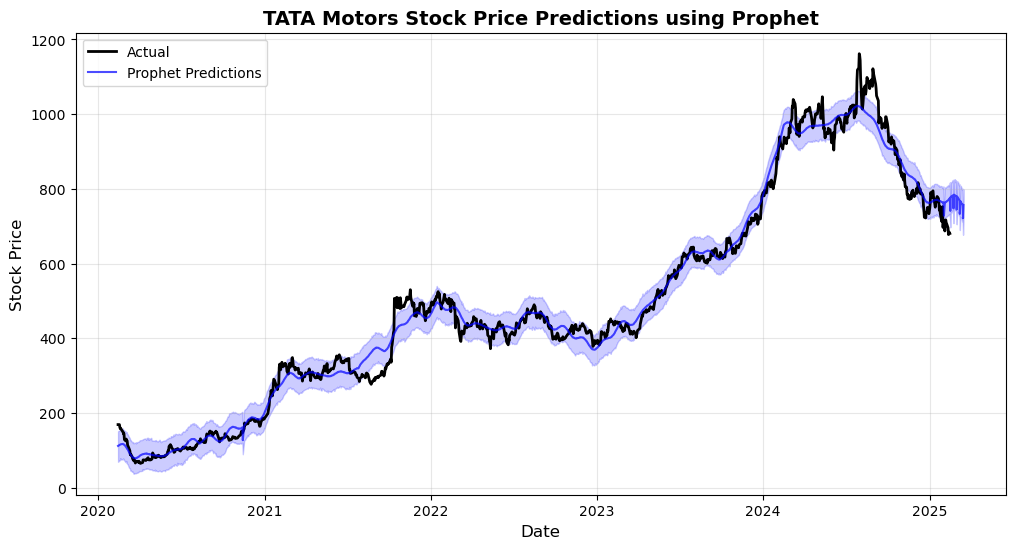

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fetch_tata_data(period="5y"):
    try:
        df = yf.download("TATAMOTORS.NS", period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("TATA Motors stock data is unavailable for this period.")
        df = df.reset_index()[["Date", "Close"]]
        df.columns = ["ds", "y"]  # Prophet requires columns named 'ds' and 'y'
        return df
    except Exception as e:
        print(f"Error fetching TATA Motors data: {e}")
        return None

def evaluate_predictions(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print("\nProphet Model Performance Metrics for TATA Motors:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

def predict_prophet(df, future_periods=30):
    model = Prophet()
    model.fit(df)
    
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)
    return forecast

def plot_predictions(df, forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Predictions', color='blue', alpha=0.7)
    
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
    
    plt.title('TATA Motors Stock Price Predictions using Prophet', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    print("Fetching TATA Motors stock data...")
    df = fetch_tata_data()
    if df is None:
        return
    
    print(f"Data shape: {df.shape}")
    print("\nFirst few rows of data:")
    print(df.head())
    
    print("\nTraining Prophet model...")
    forecast = predict_prophet(df)
    
    # Evaluate predictions
    actual = df['y'].values[-30:]
    predicted = forecast['yhat'].values[-30:]
    evaluate_predictions(actual, predicted)
    
    # Plot results
    plot_predictions(df, forecast)

if __name__ == "__main__":
    main()


In [12]:
%%writefile stock.py
import streamlit as st
from datetime import date
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go

st.title('Stock Forecast App')

# Define available stock options
stocks = {
    "Google": "GOOGL",
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "Tesla": "TSLA",
    "Tata Motors": "TATAMOTORS.NS"
}

# Streamlit UI elements
selected_stock = st.selectbox("Select dataset for prediction", list(stocks.keys()))
n_years = st.slider("Years of prediction:", 1, 4)
period = n_years * 365

@st.cache_data  # Fixes caching issues
def fetch_stock_data(stock_ticker, period="5y"):
    """Fetch stock data using Yahoo Finance with error handling."""
    try:
        df = yf.download(stock_ticker, period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception(f"{selected_stock} stock data is unavailable for this period.")
        df = df.reset_index()[["Date", "Close"]]
        df.columns = ["ds", "y"]  # Prophet requires columns 'ds' and 'y'
        return df
    except Exception as e:
        st.error(f"Error fetching {selected_stock} data: {e}")
        return None

# Load data
data_load_state = st.text("Loading data...")
df_train = fetch_stock_data(stocks[selected_stock])

if df_train is None:
    st.error(f"Skipping forecast as no valid stock data is available for {selected_stock}.")
    st.stop()

data_load_state.text("Loading data... done!")

# Show raw data
st.subheader("Raw data")
st.write(df_train.tail())

# Plot raw data
def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train["ds"], y=df_train["y"], name="Stock Close Price"))
    fig.layout.update(title_text="Time Series Data with Rangeslider", xaxis_rangeslider_visible=True)
    st.plotly_chart(fig)

plot_raw_data()

# Forecasting using Prophet
m = Prophet()
m.fit(df_train)

future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Display forecast results
st.subheader("Forecast data")
st.write(forecast.tail())

st.write(f"Forecast plot for {n_years} years")
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)


Overwriting stock.py
